# (A) Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# (B) Dataset

### Downloading the dataset via kaggle api
- [Kaggle  Dataset](https://www.kaggle.com/datasets/shwetabh123/mall-customers?select=Mall_Customers.csv)

In [2]:
# Download kaggle api
!pip install -q kaggle

In [3]:
# Creat the convenient dir for token. (The system will seach this dir)
! mkdir ~/.kaggle

- Upload your kaggle token
- For creating a token
  - Sign in your Kaggle account,
  - Open Account section from  your icon menu
  - Scroll to API section
  -  Click on __Create New API Token__
     - It will download kaggle.json file on your machine. 
  - Upload this kaggle.json file into your working directory on your google colab session.
  - Run floowing codes

In [4]:
# upload your kaggle token to download dataset.
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [5]:
# Copy the json file into correct path, then remove the firt one it
! cp kaggle.json ~/.kaggle/
! rm -f kaggle.json

In [6]:
# Set the token can't readable for other user if you save it somewhere
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Download your data "Competition-name"
#! kaggle competitions download -c 'competition-name'
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 1.34MB/s]


In [8]:
!unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [9]:
!ls

customer-segmentation-tutorial-in-python.zip  Mall_Customers.csv  sample_data


## Loading the dataset

In [10]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## About Dataset
### Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

### Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

## Attributes & Stats of the dataset

In [11]:
# statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [14]:
# Subvalues of the categorical datas
for col in df.select_dtypes(include=["object"]):
    print(f"{col}\n" ,df[col].value_counts(), end="\n"*2)

Gender
 Female    112
Male       88
Name: Gender, dtype: int64



# (C) Preprocessing the dataset

### Adjusting dtypes for categorical data

In [15]:
for col in df.select_dtypes(include=("object")).columns: df[col] = df[col].astype("category")

In [16]:
num_cols = df.select_dtypes(exclude=["object","category"]).columns
cat_cols = df.select_dtypes(include=["object","category"]).columns

## (1) Quick (EDA) Checks

### Checking the Variable Relations
- Checking the Variable Relations for deterninating variables which we will be focued on 

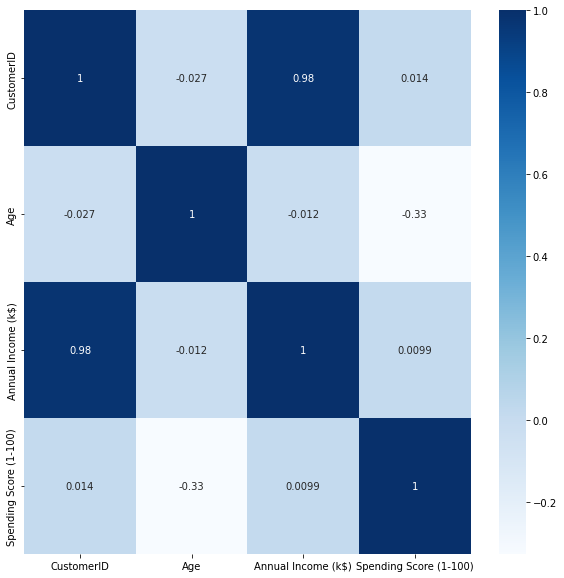

In [17]:
# Extracting the relations
corr = df.corr()

# Configurating plot
col_size = len(df.columns)
plt.figure(figsize=(col_size*2,col_size*2))

# Plotting
sns.heatmap(corr, annot=True, cmap="Blues");

Text(0.5, 1.0, 'Negative Correlation (neg> 0.7)')

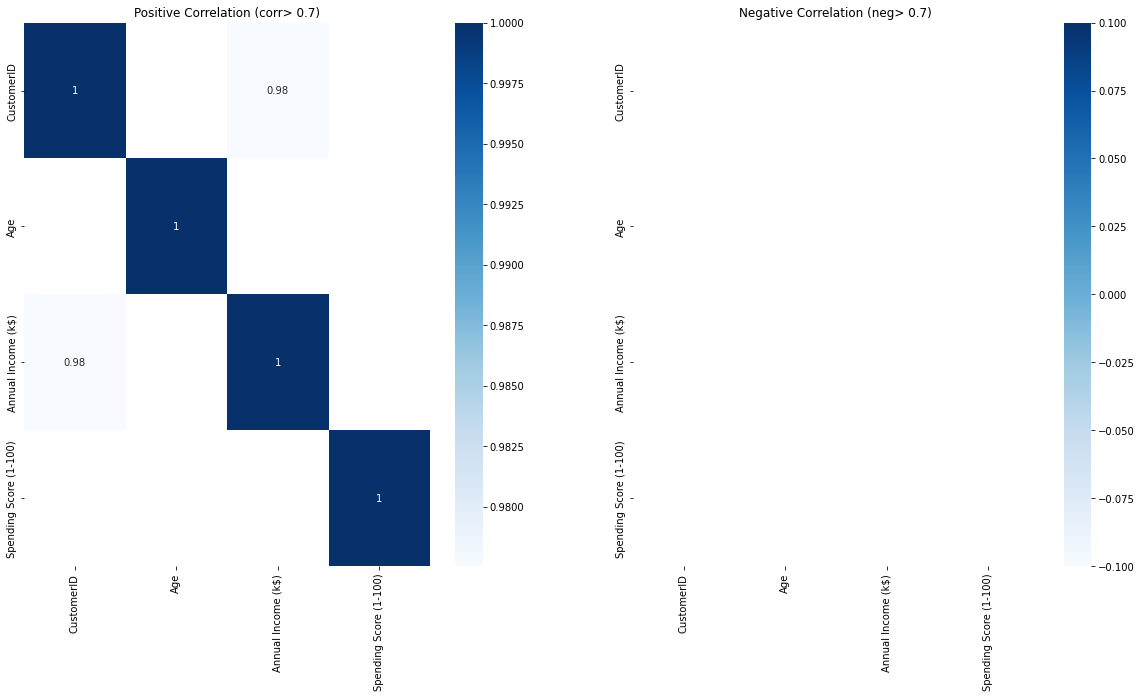

In [18]:
# Extracting the pos & neg corrs
p_th = 0.7
positive = corr[corr>p_th]

n_th = -0.7
negative = corr[corr<n_th]

# Configurating plot
col_size = len(df.columns)
plt.figure(figsize=(20,10))

# plotting as multiple axis
plt.subplot(1,2,1)
sns.heatmap(positive, annot=True, cmap="Blues");
plt.title("Positive Correlation (corr> 0.7)")

plt.subplot(1,2,2)
sns.heatmap(negative, annot=True, cmap="Blues");
plt.title("Negative Correlation (neg> 0.7)")

### Distribution Check

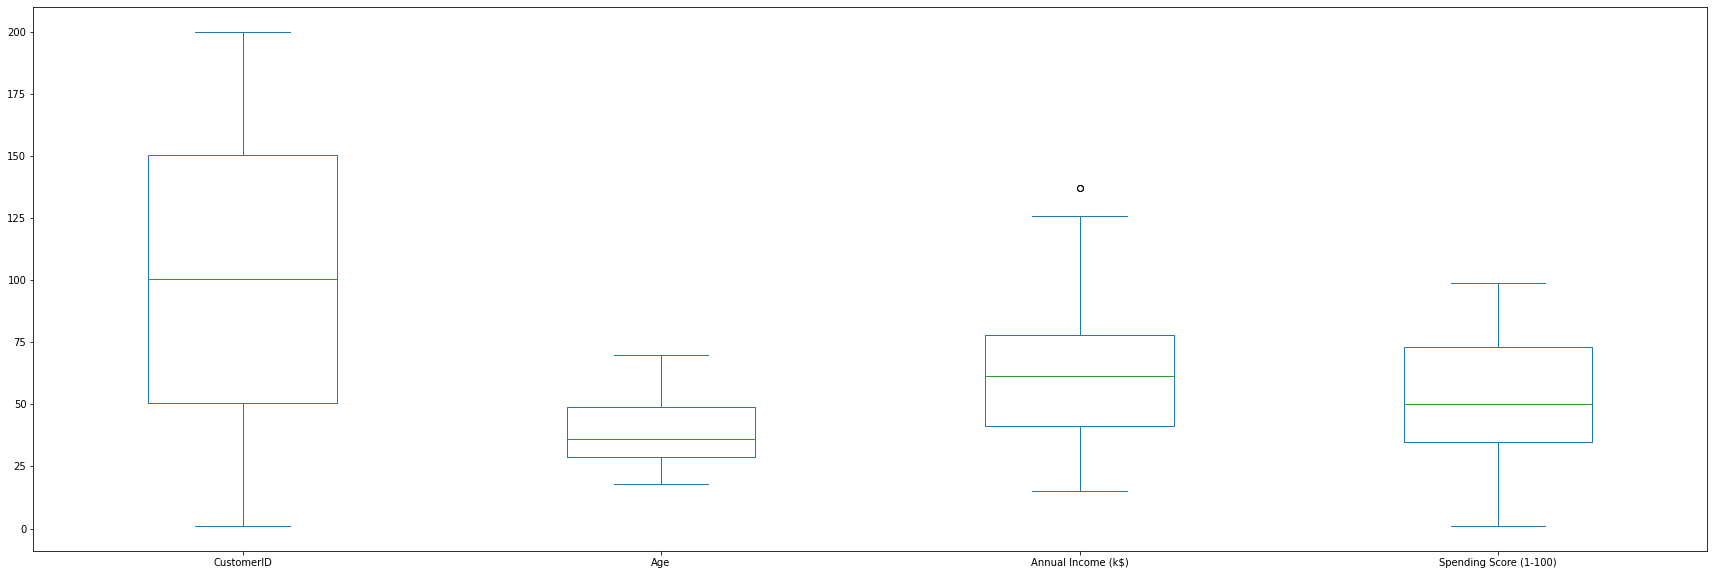

In [19]:
df.plot.box(figsize=(30,10));

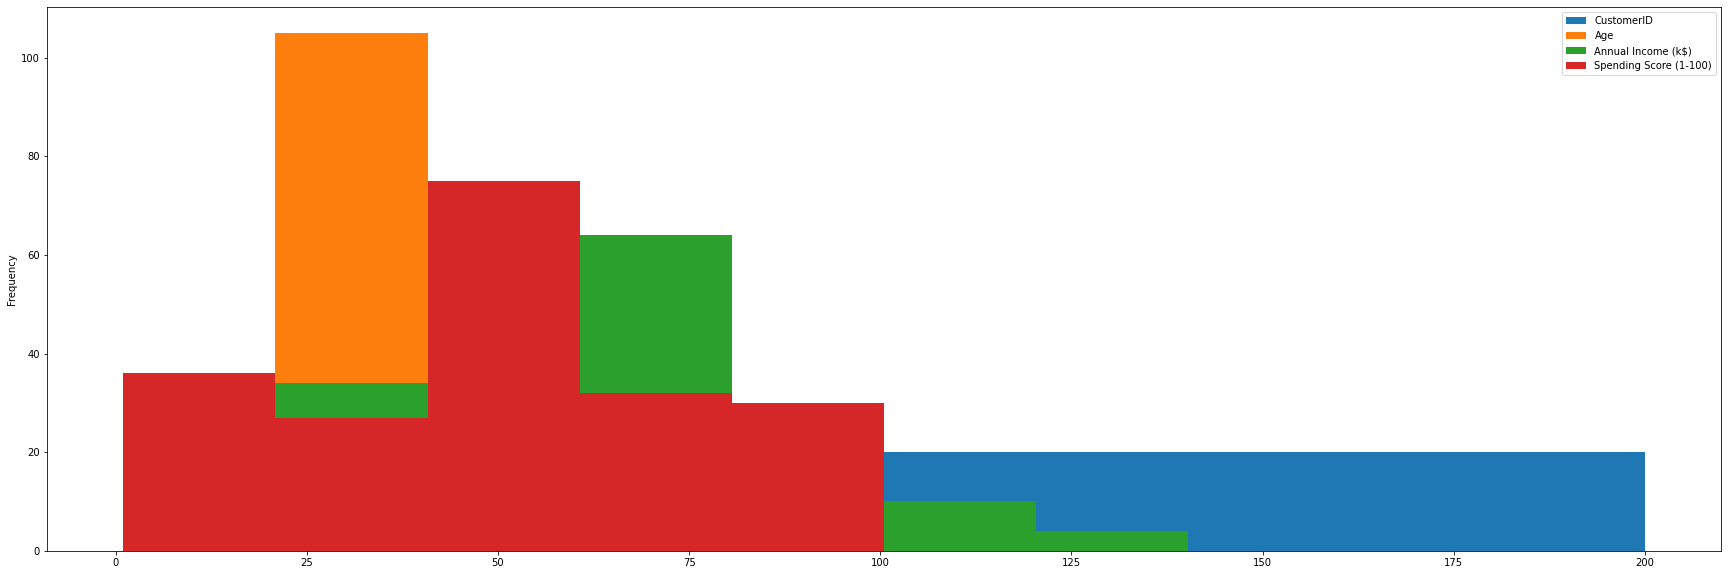

In [20]:
df.plot.hist(figsize=(30,10));

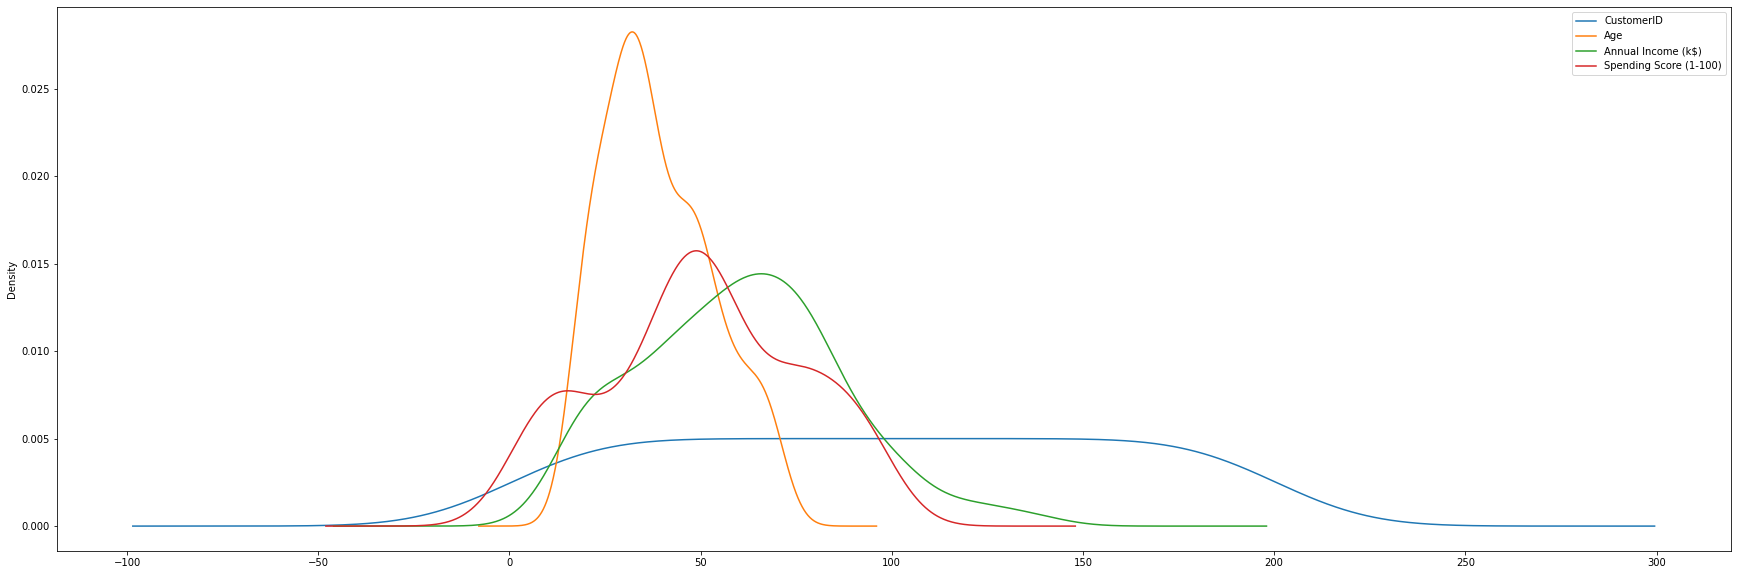

In [21]:
df.plot.kde(figsize=(30,10));

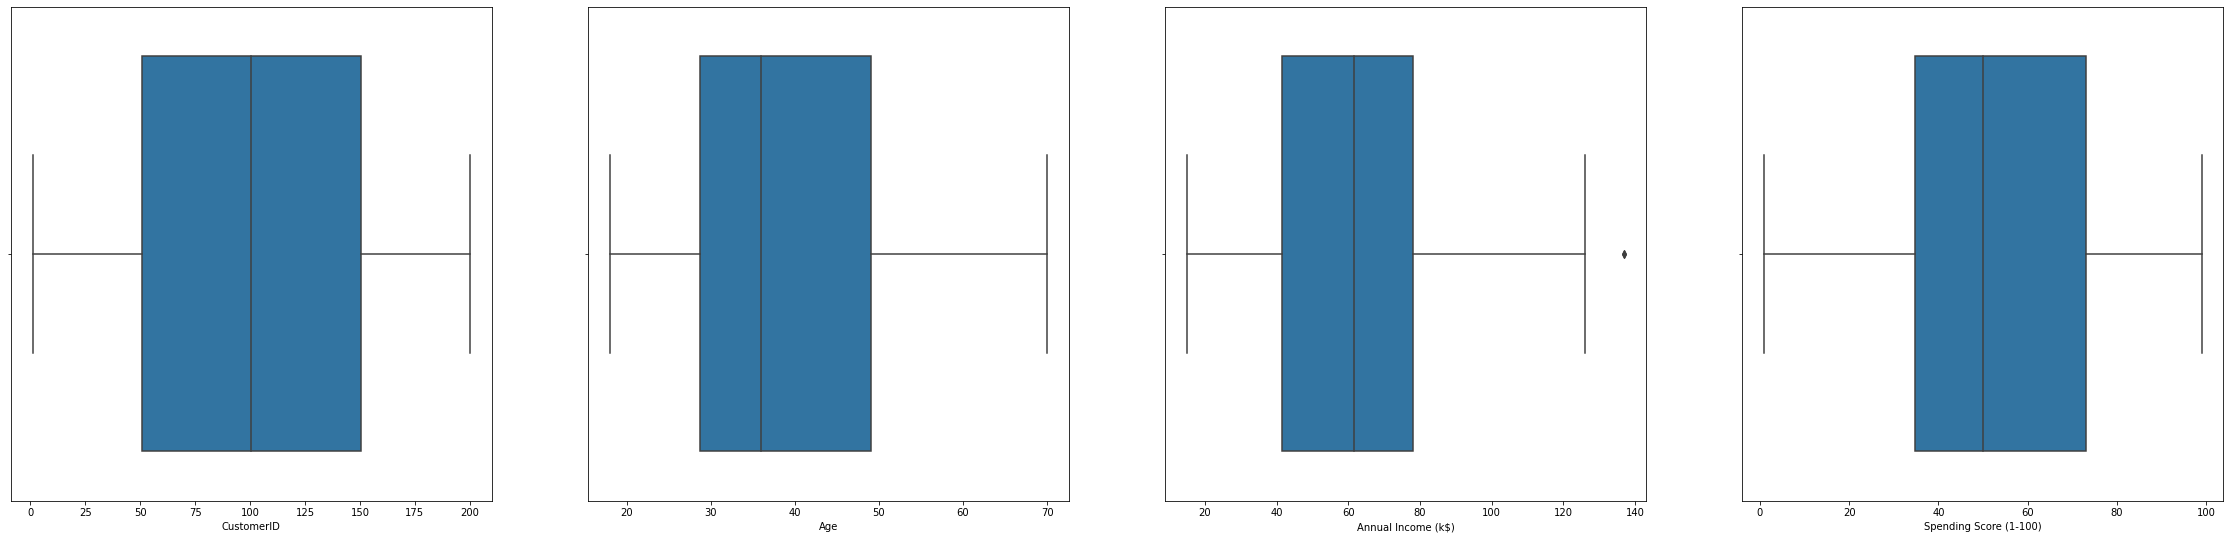

In [22]:
size = len(df.columns)
cs, rs = (5, size//5+1) if size >=5 else (3, size//3+1)

plt.figure(figsize=(cs*10, rs*10))
for i, col in enumerate(df.select_dtypes(exclude=("object","category")).columns):
  plt.subplot(rs,cs,i+1)
  sns.boxplot(df[col])
  

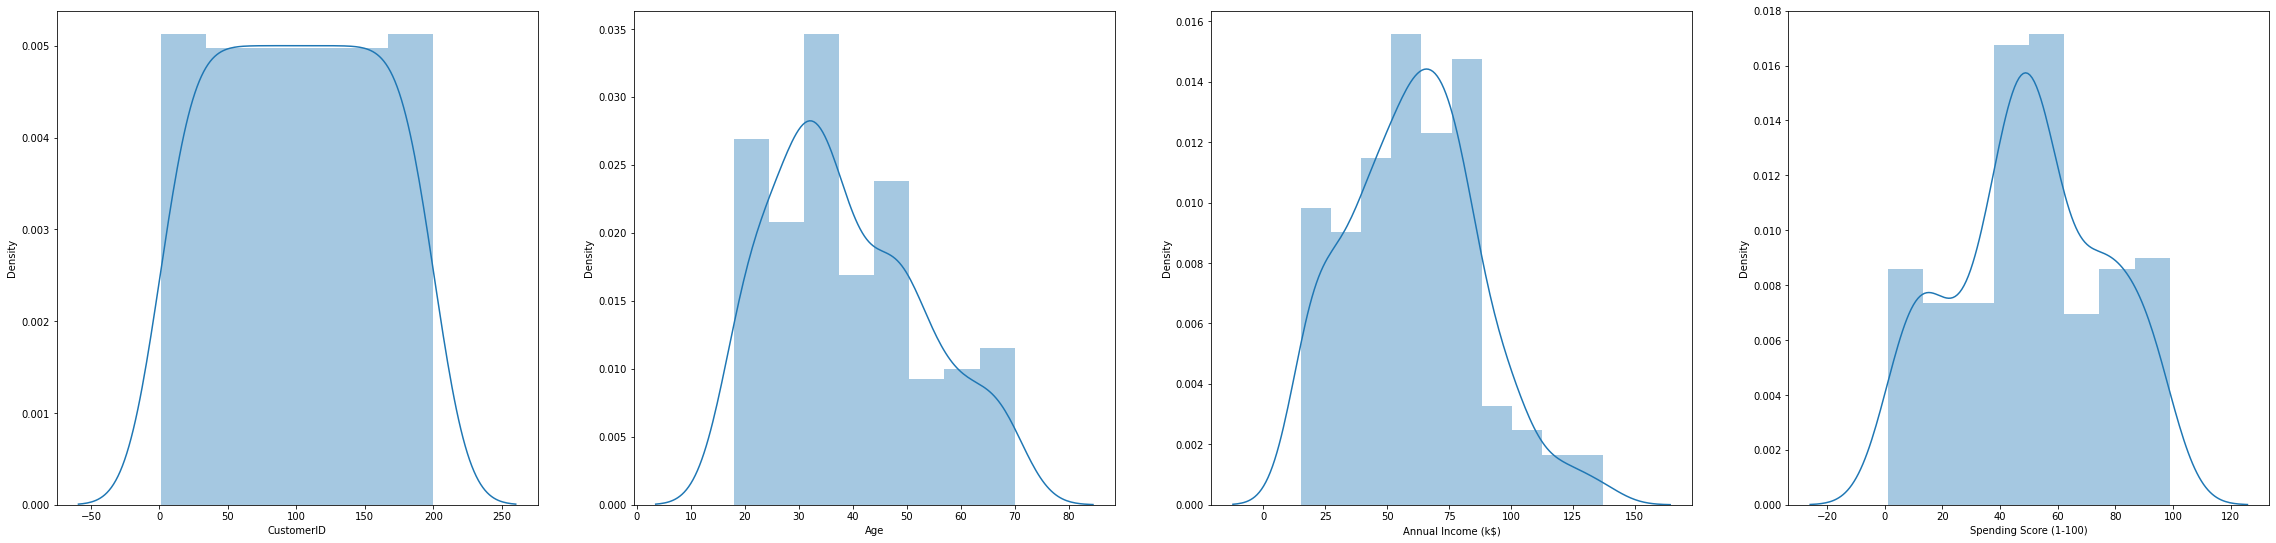

In [23]:
size = len(df.columns)
cs, rs = (5, size//5+1) if size >=5 else (3, size//3+1)

plt.figure(figsize=(cs*10, rs*10))
for i, col in enumerate(df.select_dtypes(exclude=("object","category")).columns):
  plt.subplot(rs,cs,i+1)
  sns.distplot(df[col])

## (2) Missing Value 

### Finding out the missing values

In [24]:
# find the null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

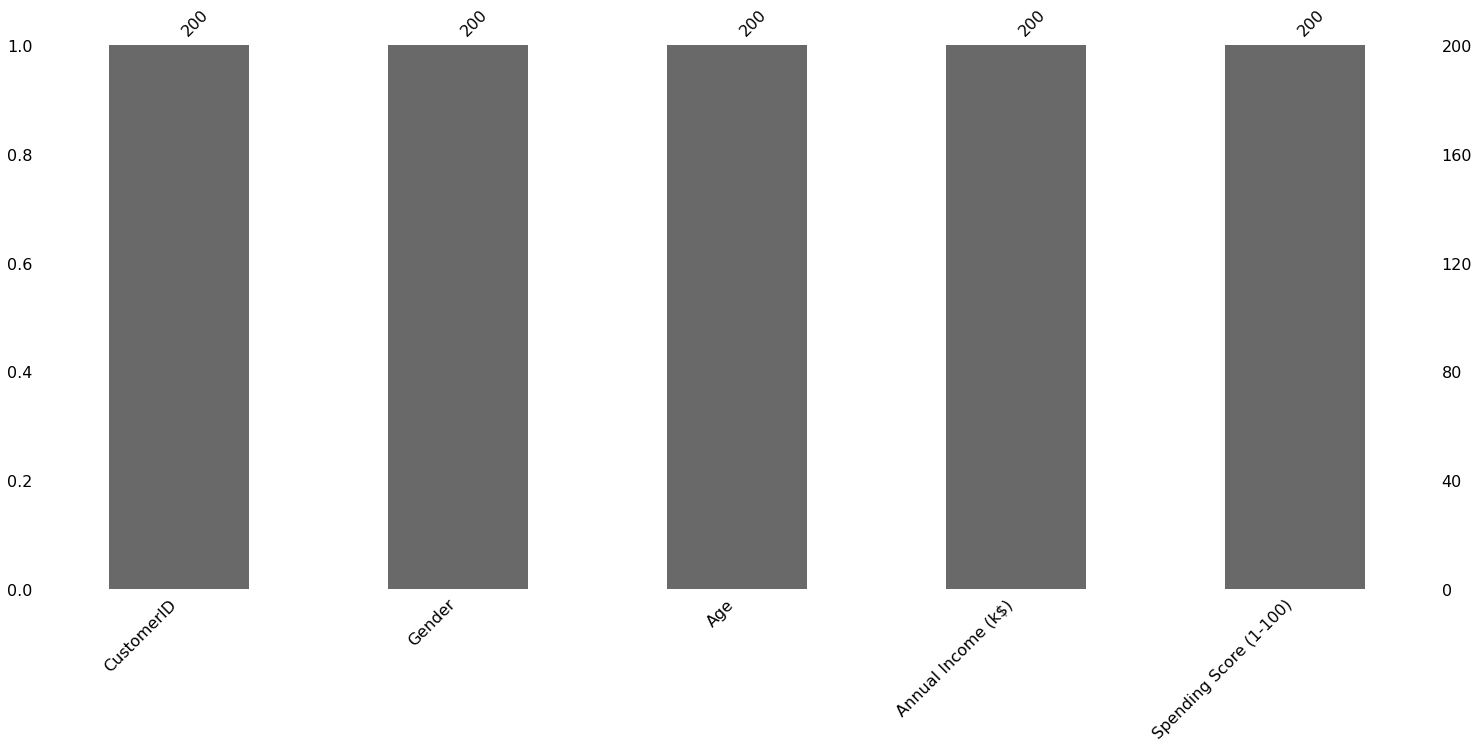

In [25]:
import missingno as msno
msno.bar(df);

<AxesSubplot:>

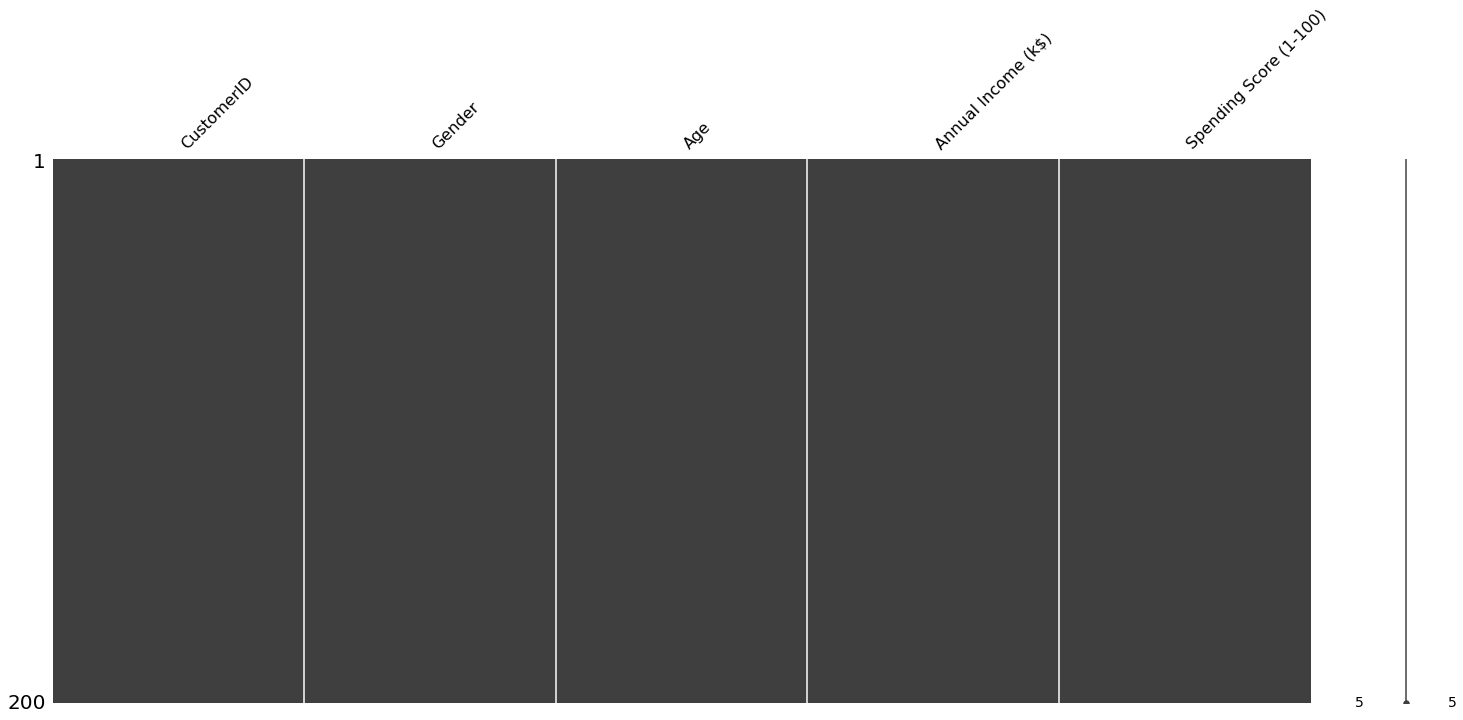

In [26]:
msno.matrix(df)

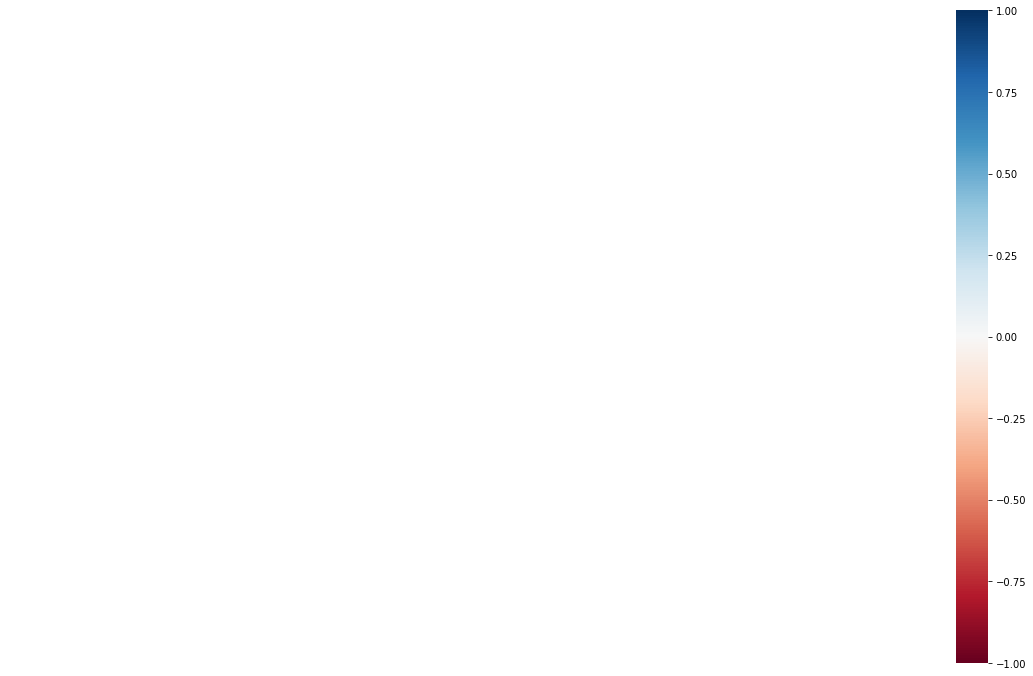

In [27]:
msno.heatmap(df);

### Handling The Missing Values
- There is no missing value 


In [28]:
# Updating the column names after the editing dataset
num_cols = df.select_dtypes(exclude=["object","category"]).columns
cat_cols = df.select_dtypes(include=["object","category"]).columns

## (3) Outlier Analysis

### Visual Approach

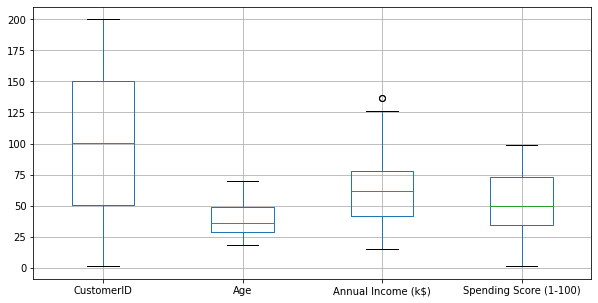

In [29]:
plt.figure(figsize=(10,5));
df.boxplot();

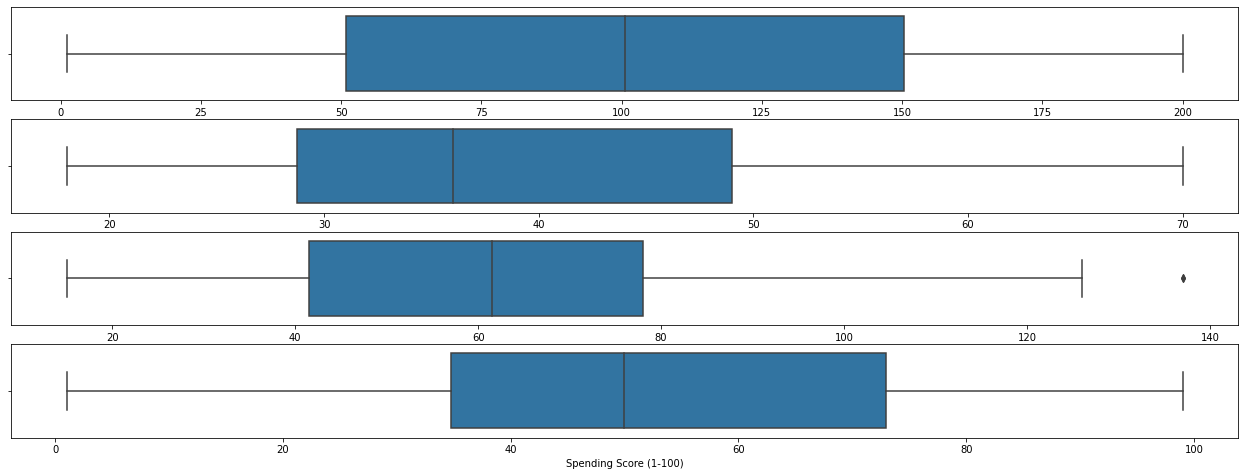

In [30]:
cum_col_sie = len(num_cols)

plt.figure(figsize=(22, 10))
for i, col in enumerate(num_cols):
  plt.subplot(5, cum_col_sie//5+1, i+1)
  sns.boxplot(df[col]);

### IQR approach

- Note that
  - If you want to change a certain pertantage of the data for handling outliers.
    - You can adjust the ratio param forn  IQR_calculator funct to adjust inliar range.
  - If the ratio increate, 
    - outlier count will be reduce. Just the most outliers will be captured. 

#### Calculating IQR
- Calculates
  - __IQR__ pandas series for all the given variables
  - __l_th__ lower_threashold pandas series for all the given variables
  - __h_th__ higher_threashold pandas series for all the given variables

In [31]:
def IQR_calculator(df, ratio=1.5):
    # Calculating the quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # IQR range calculation
    IQR = Q3 -Q1

    # Determinating the boundaries
    lower_threashold = Q1 - ratio * IQR
    higher_threashold = Q3 + ratio *IQR
    
    return IQR, lower_threashold, higher_threashold

In [32]:
IQR, l_th, h_th = IQR_calculator(df, ratio=1.5)

In [33]:
from pprint import pprint
for i in [IQR, l_th, h_th]:
  print("-"*20)
  pprint(i)
  print("-"*20, end="\n"*2)

--------------------
CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64
--------------------

--------------------
CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64
--------------------

--------------------
CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64
--------------------



### Finding out The outlier values
- Finds __is_outlier__ and __is_outlier_val__ dataframes which include boolean value for ever individual value.

In [34]:
def find_outlier_single(data:pd.DataFrame, lower_threashold:float, higher_threashold:float)->pd.DataFrame:
    boolean_outlier_df = (data < lower_threashold) | (higher_threashold < data)
    return boolean_outlier_df

In [35]:
def find_outlier(df:pd.DataFrame, lower_threashold:pd.Series, higher_threashold:pd.Series)->pd.DataFrame:
    data = df[lower_threashold.index]
    boolean_outlier_df = (data < lower_threashold) | (higher_threashold < data)
    return boolean_outlier_df

In [36]:
# Getting the outlier indexes
is_outlier = find_outlier(df, l_th, h_th)
is_outlier.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [37]:
is_outlier.sum()

CustomerID                0
Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64

In [38]:
outlier_ratios = (is_outlier.sum() / df[is_outlier.columns].count()).sort_values(ascending=False)
outlier_ratios

Annual Income (k$)        0.01
CustomerID                0.00
Age                       0.00
Spending Score (1-100)    0.00
dtype: float64

In [39]:
signf = 0.05
top_outlier =  outlier_ratios[outlier_ratios > signf]
top_outlier

Series([], dtype: float64)

### Handling outlier
- There are no outliers in the dataset, so no handling process is implemented

#### Util Functions

In [40]:
def mean_assignment(data:pd.Series, is_outlier:pd.Series, value:float):
  "It assigns given value to the outlier values"
  data[is_outlier] = value
  return data

# usage # df["c1"] = mean_assignment(df["c1"], is_outlier["c1"], df["c1"].mean()):

In [41]:
def boundary_casting(data:pd.Series, l_th:float, h_th:float):
  "It assigns border values to the outlier values"
  
  data[ data < l_th ] = l_th
  data[ h_th < data ] = h_th

  return data

# (4) Exploratory Data Analysis

## Variables

<AxesSubplot:xlabel='Gender', ylabel='count'>

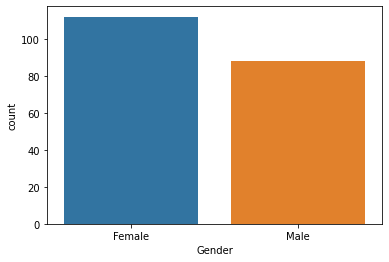

In [42]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

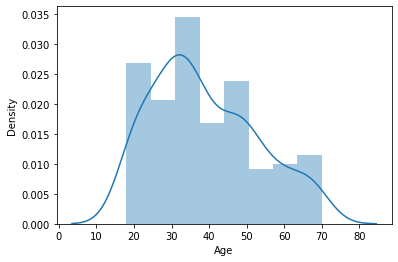

In [43]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

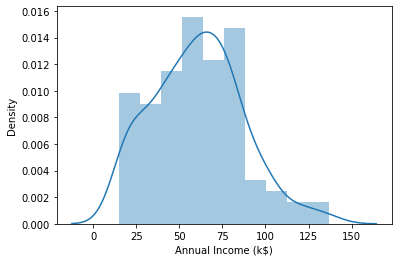

In [44]:
sns.distplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

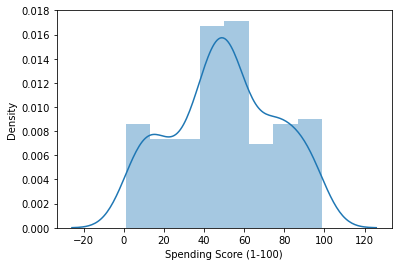

In [45]:
sns.distplot(df['Spending Score (1-100)'])

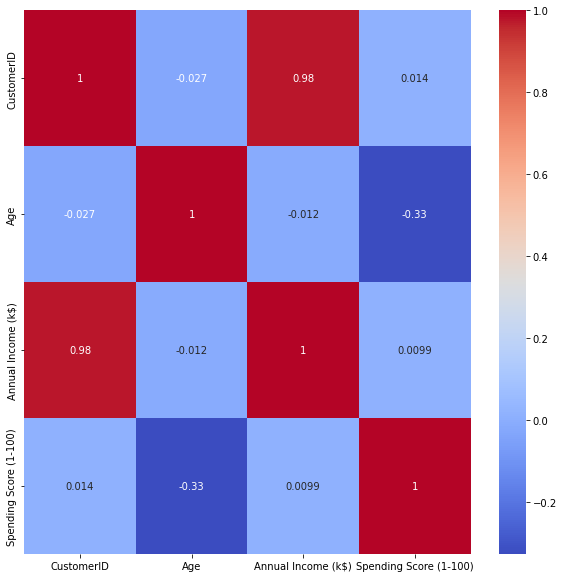

In [46]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm');

## Dataset 

### Spesifications

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Gender                  200 non-null    category
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 6.7 KB


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [49]:
pd.unique(df.select_dtypes(include=["object","category"]).values.ravel('k'))

array(['Male', 'Female'], dtype=object)

## Univariate Analysis

In [50]:
num_cols = df.select_dtypes(include=("int64","float64"), exclude=("bool") ).columns
cat_cols = df.select_dtypes(exclude=("int64","float64")).columns

In [51]:
num_cols

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [52]:
len(df.columns), df.columns

(5, Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
        'Spending Score (1-100)'],
       dtype='object'))

In [53]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  200 non-null    category
dtypes: category(1)
memory usage: 452.0 bytes


In [54]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


### Feature Variables [Numerical]

#### setting the plotting params

In [57]:
# Defining the params
target_var = "Purchase"
#num_cols = df.select_dtypes(exclude='category').columns
num_col_size = len(num_cols)
cols, rows = (3, num_col_size//3 + 1) if num_col_size > 5 else (5, 1) 
figsize = (cols*7, rows*5)

#### [histplot] Distributions

In [58]:
num_cols

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

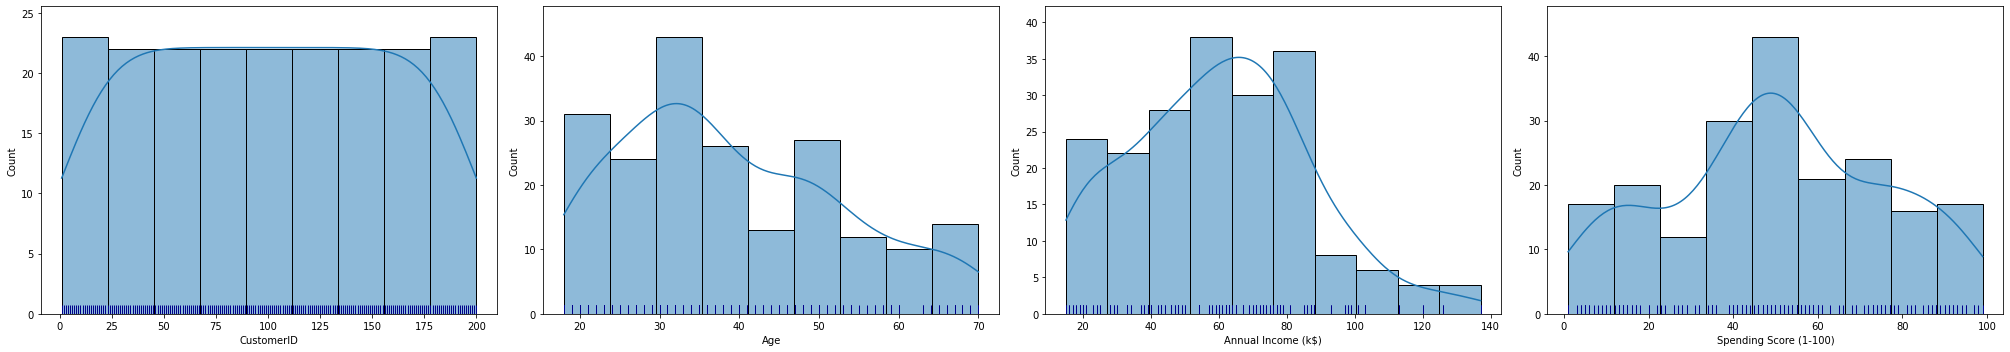

In [59]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x=df[col], data=df, kde=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

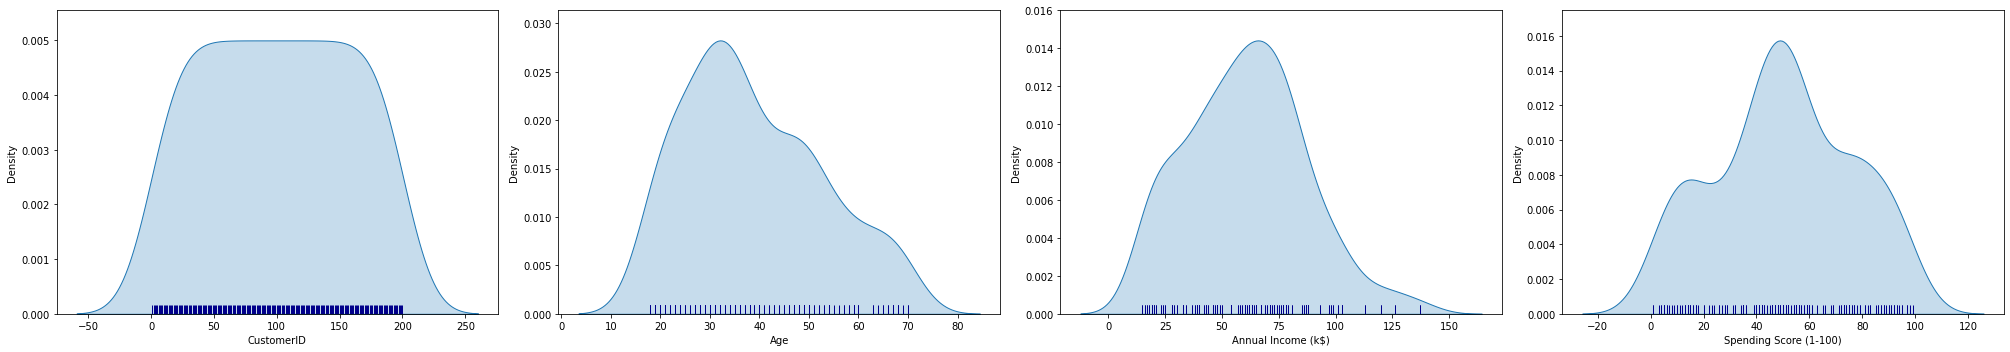

In [60]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x=df[col], data=df ,shade=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

#### [boxplot] Distributions with quartiles (Outlier)

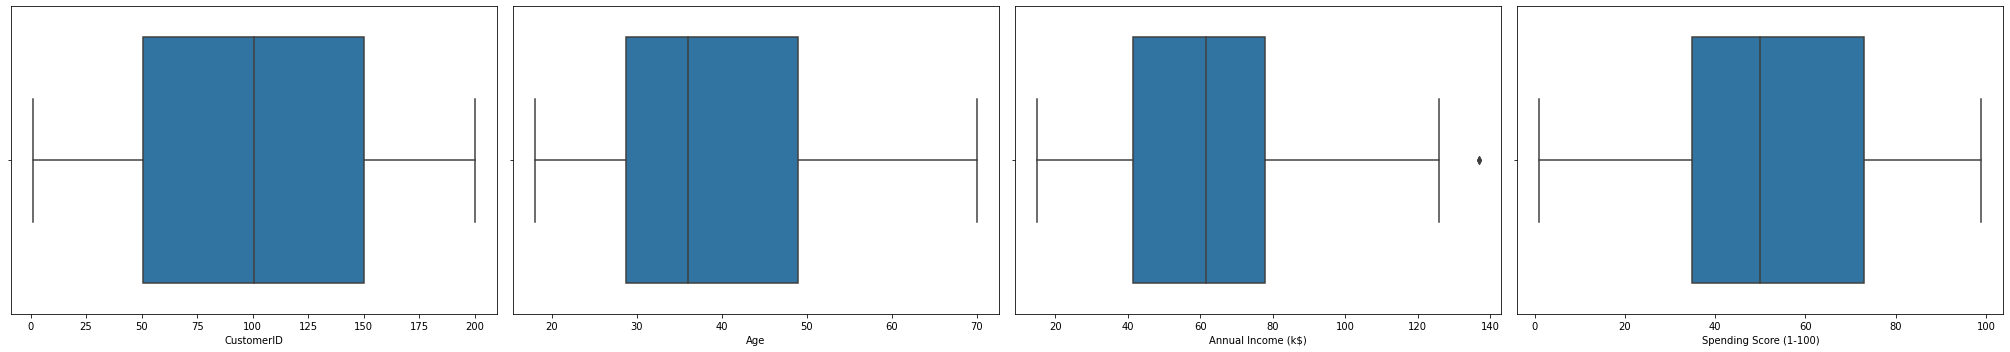

In [61]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [violinplot] Distributions with quartiles and density

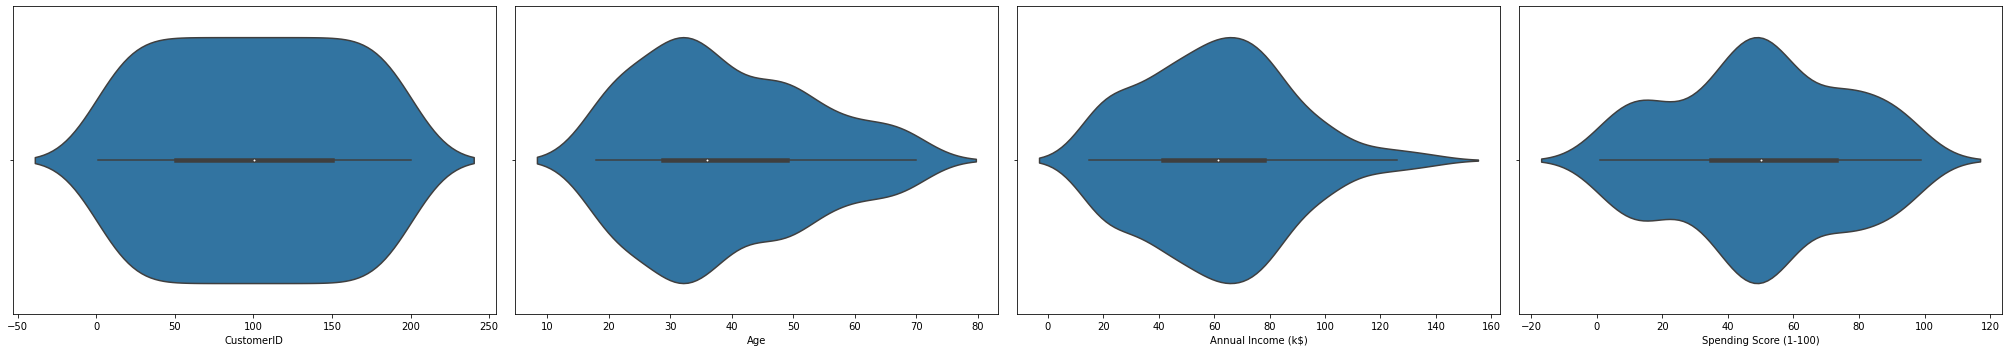

In [62]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # violinplot
    sns.violinplot(x=df[col], show_medians=True, ax=ax)
    
fig.tight_layout()  
plt.show()

#### [stripplot] spread of the data with stripplot

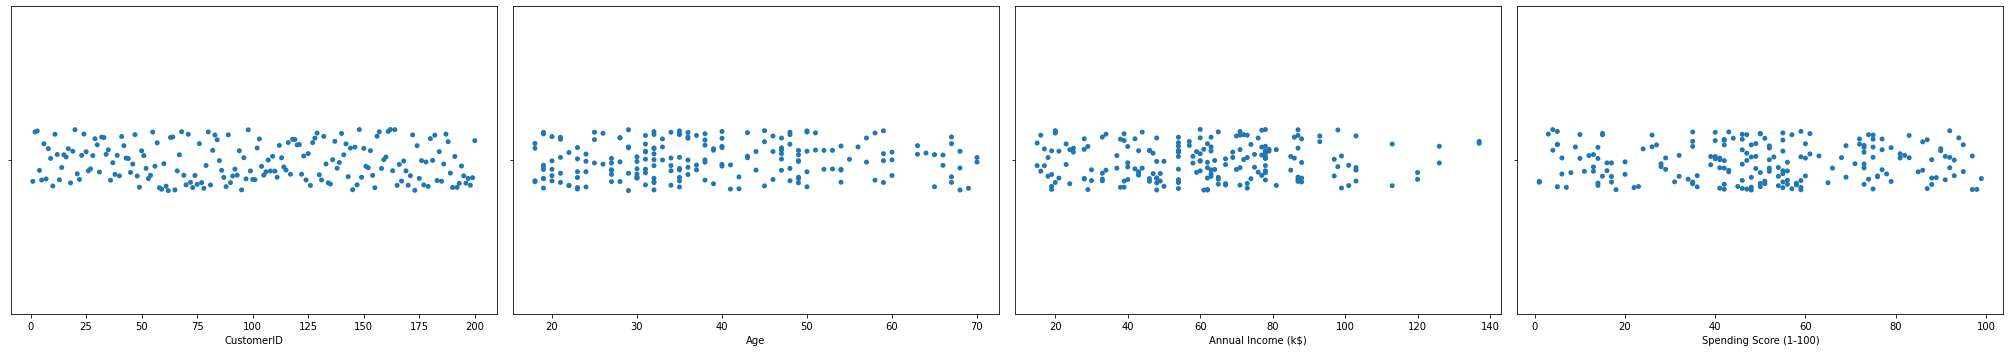

In [63]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # stripplot
    sns.stripplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [swarmplot] spread of the data with stripplot (avoids overlap)
```python
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # swarmplot
    sns.swarmplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()
```

#### [scatterplot] Spread of data 

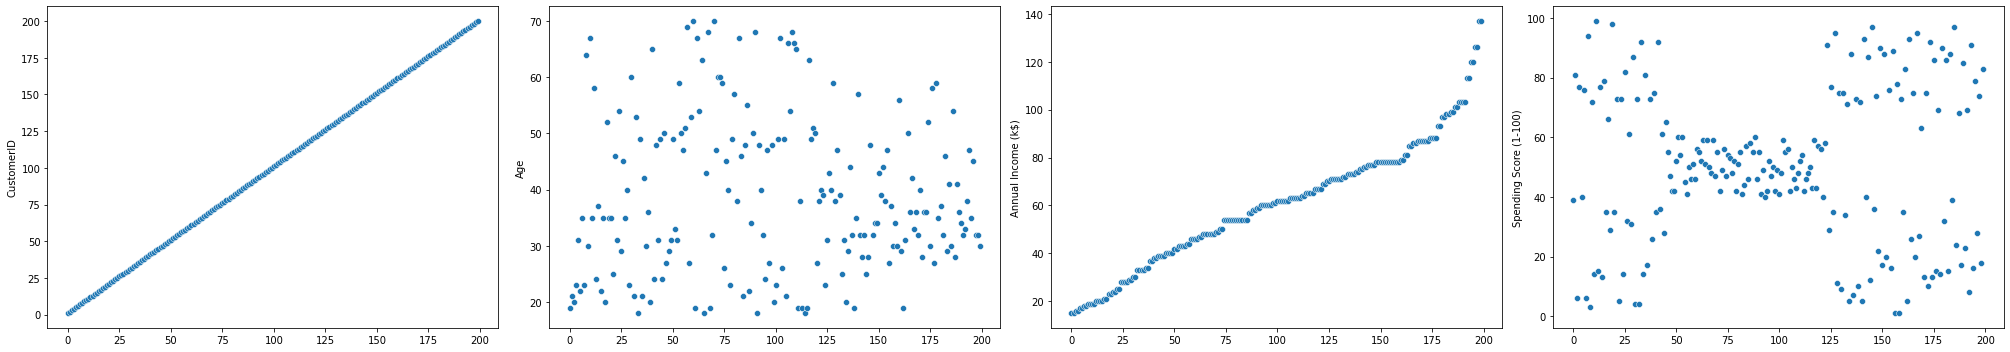

In [64]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # scatterplot
    sns.scatterplot(x = df[col].index, y= df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [lineplot] Trend

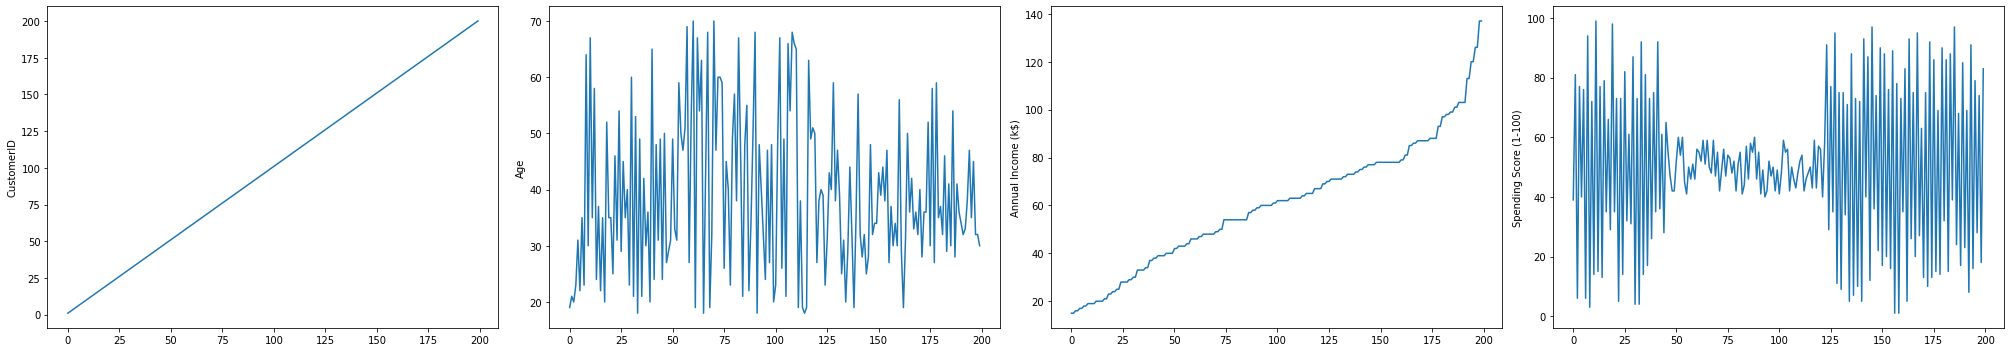

In [65]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.lineplot(x=df[col].index, y=df[col], ax=ax)
    #sns.scatterplot(x = df[col].index, y= df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

### Feature Variables [Categorical]

#### setting the plotting params

In [66]:
# Defining the params
target_var = "Purchase"
#num_cols = df.select_dtypes(exclude='category').columns
cat_col_size = len(cat_cols)
cols, rows = (3, cat_col_size//3 + 1) if cat_col_size > 5 else (5, 1) 
figsize = (cols*7, rows*5)

In [67]:
cat_cols

Index(['Gender'], dtype='object')

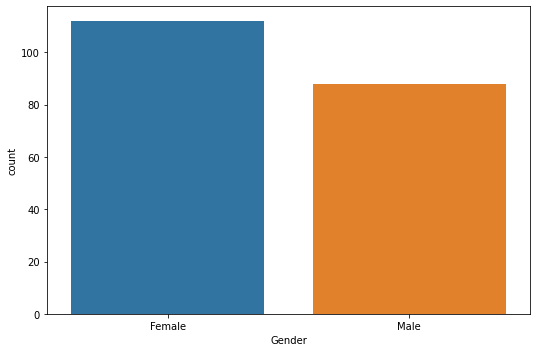

In [68]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(cat_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.countplot(x=df[col], ax=ax)
    #sns.scatterplot(x = df[col].index, y= df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

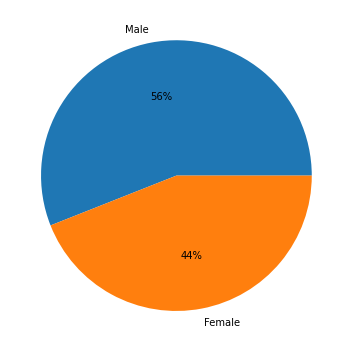

In [69]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(cat_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
  
    # boxplot
    plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct="%.0f%%");
    #sns.scatterplot(x = df[col].index, y= df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

## Relations

### Quick Variable Relation

In [70]:
def rel_filter(df:pd.DataFrame, th:float)->pd.DataFrame:
  # Calculating the relations
  corr = df.corr()

  # filtering the relations
  filtered_corr = corr[corr > th]  if th > 0.0 else corr[corr < th]

  return filtered_corr

def rel_plotter(corr:pd.DataFrame, title:str="Correlations", figsize:tuple=None, cmap="Blues", annot=True):
  
  # plotting configurations
  if figsize != None: plt.figure(figsize=figsize)

  # plotting the relattions
  sns.heatmap(corr, cmap="Blues", annot=True)
  plt.title(title);

def get_relations(corr:pd.DataFrame, th:float)->list:

  # decleration of params
  columns = corr.columns
  is_exceed = (lambda rel: rel > th)  if th > 0 else (lambda rel: rel < th)  

  # getting the column names which exceedes the threashold
  filtered_relations = list()
  for row in columns:
    for col in columns:
        
        # Pass the correaltion with itself
        if col==row: continue

        # Collect variables which exvide threashold correlation 
        cur_corr = corr.loc[row, col]
        if  is_exceed(cur_corr):

          # Check whether the record have already added
          is_already_added = [ all([ e in record for e in [row, col] ])  for record in filtered_relations ]
          
          # Add if it have not already added
          if not any(is_already_added): filtered_relations.append([row, col, np.round(cur_corr, 2)]) 
  
  return filtered_relations

In [71]:
get_relations(df.corr(), 0.85), get_relations(df.corr(), 0.85)

([['CustomerID', 'Annual Income (k$)', 0.98]],
 [['CustomerID', 'Annual Income (k$)', 0.98]])

In [72]:
get_relations(df.corr(), 0.5), get_relations(df.corr(), 0.5)

([['CustomerID', 'Annual Income (k$)', 0.98]],
 [['CustomerID', 'Annual Income (k$)', 0.98]])

In [73]:
get_relations(df.corr(), (-0.7)), get_relations(df.corr(),  (-0.7))

([], [])

In [74]:
get_relations(df.corr(), -0.5), get_relations(df.corr(), -0.5)

([], [])

### Correlation

<AxesSubplot:>

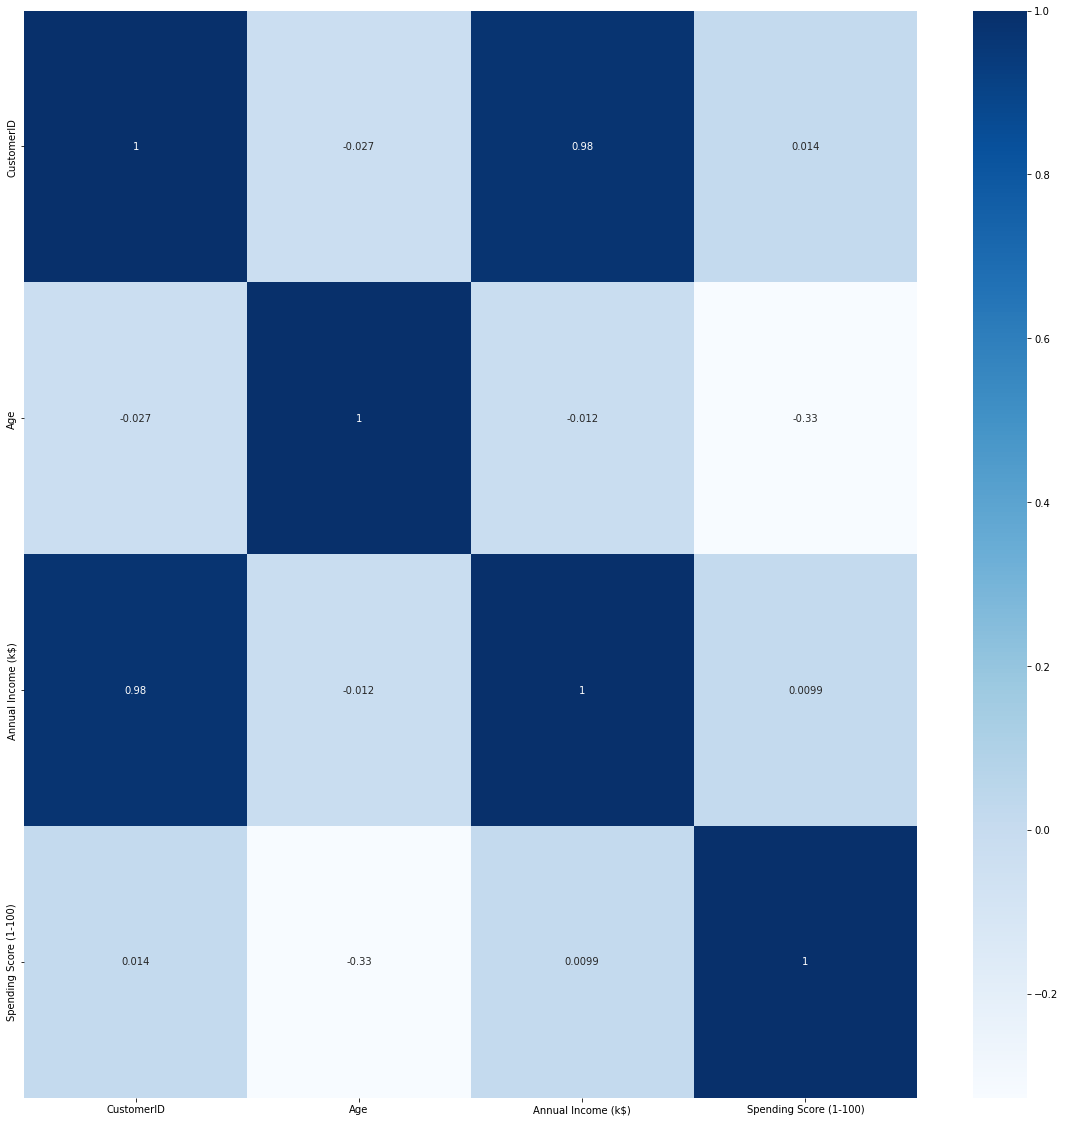

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

<AxesSubplot:>

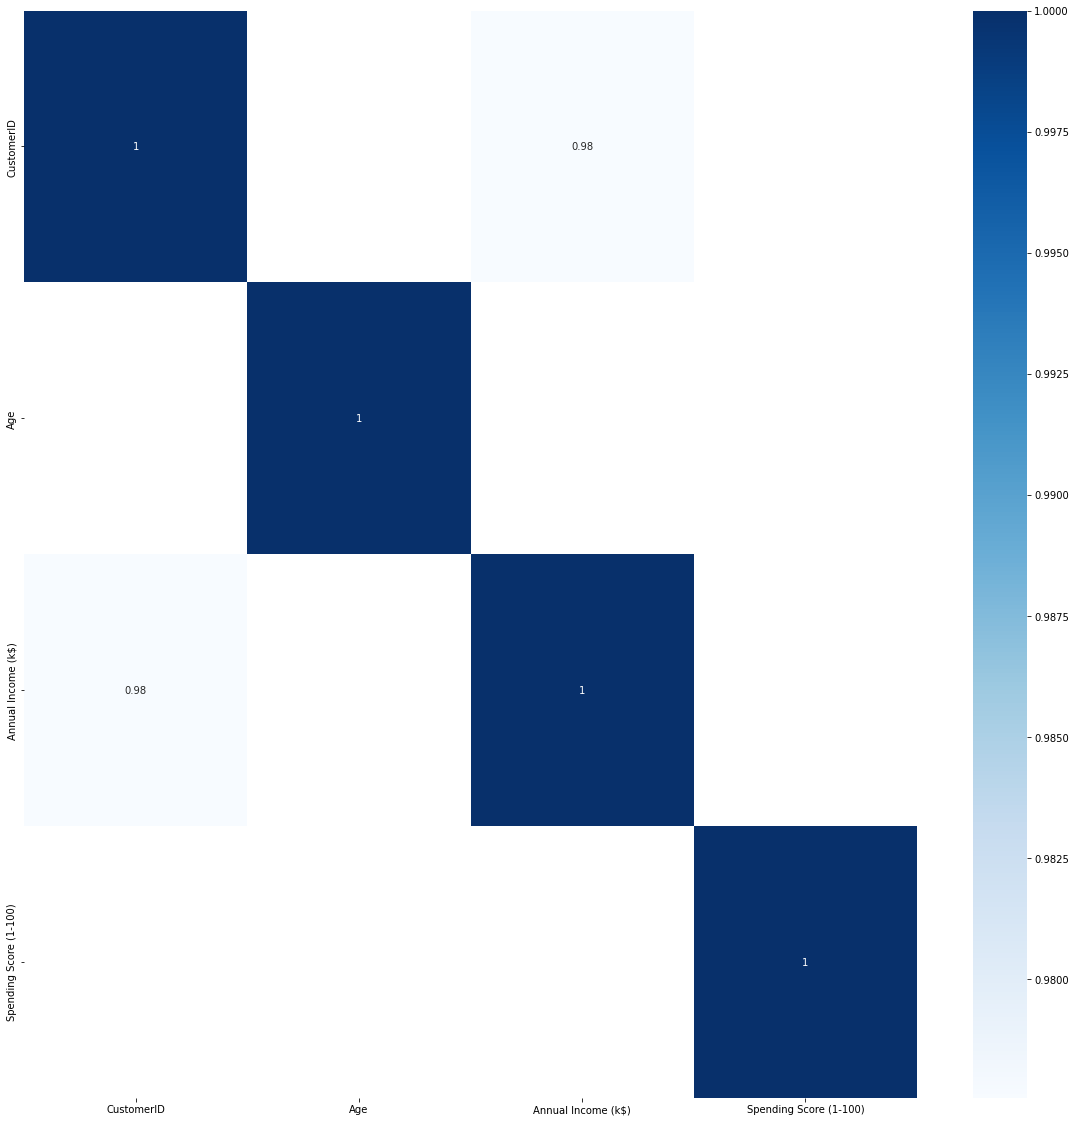

In [79]:
plt.figure(figsize=(20,20))
th = 0.7
sns.heatmap(df.corr()[df.corr() > th], annot=True, cmap='Blues')

<AxesSubplot:>

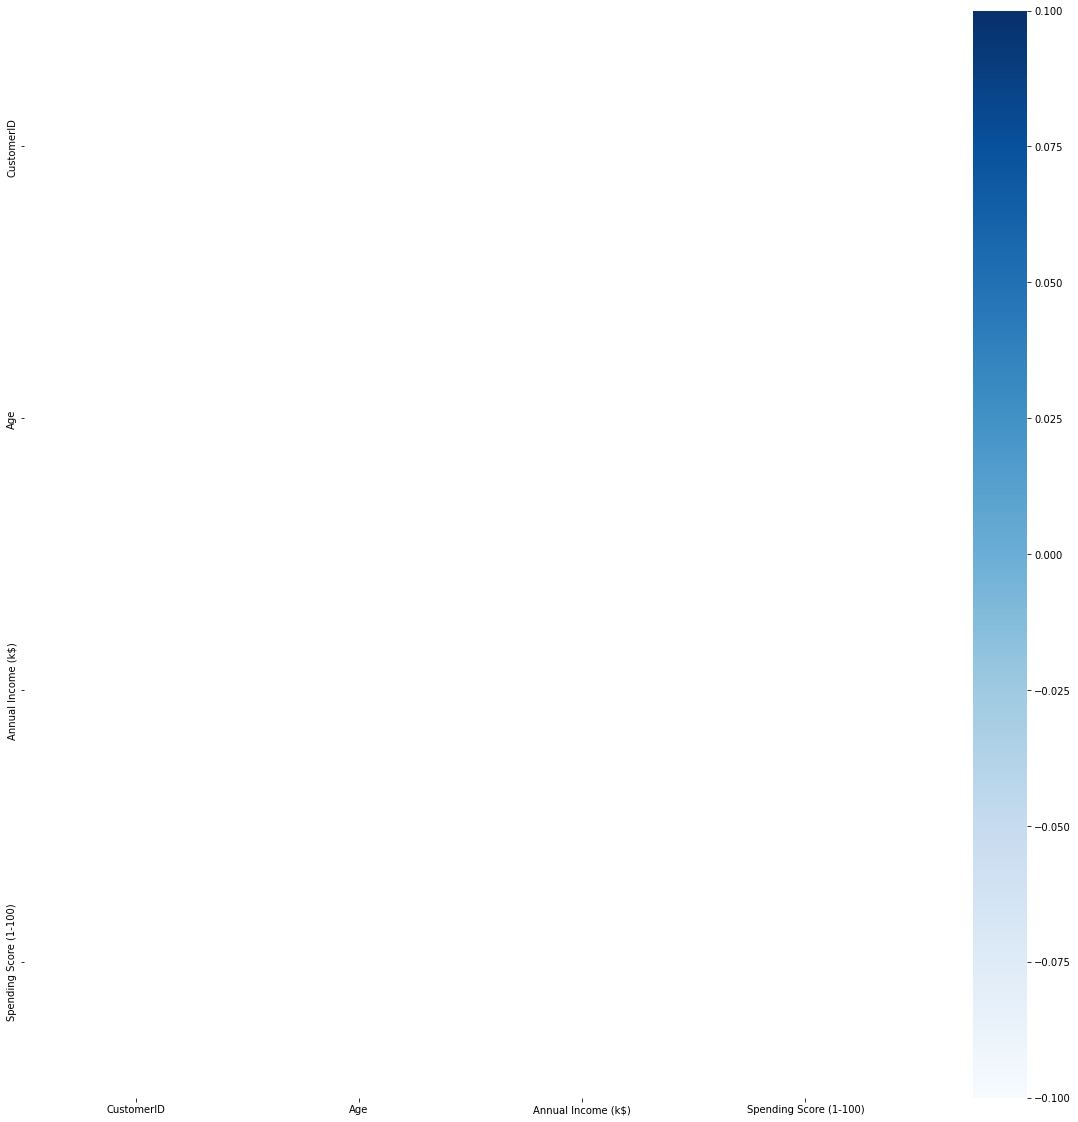

In [80]:
plt.figure(figsize=(20,20))
th = -0.7
sns.heatmap(df.corr()[df.corr() < th], annot=True, cmap='Blues')

### Variances

In [83]:
import numpy as np
variance_per_var = np.round(df.var().sort_values(ascending=False), 2)
variance_per_var

CustomerID                3350.00
Annual Income (k$)         689.84
Spending Score (1-100)     666.85
Age                        195.13
dtype: float64

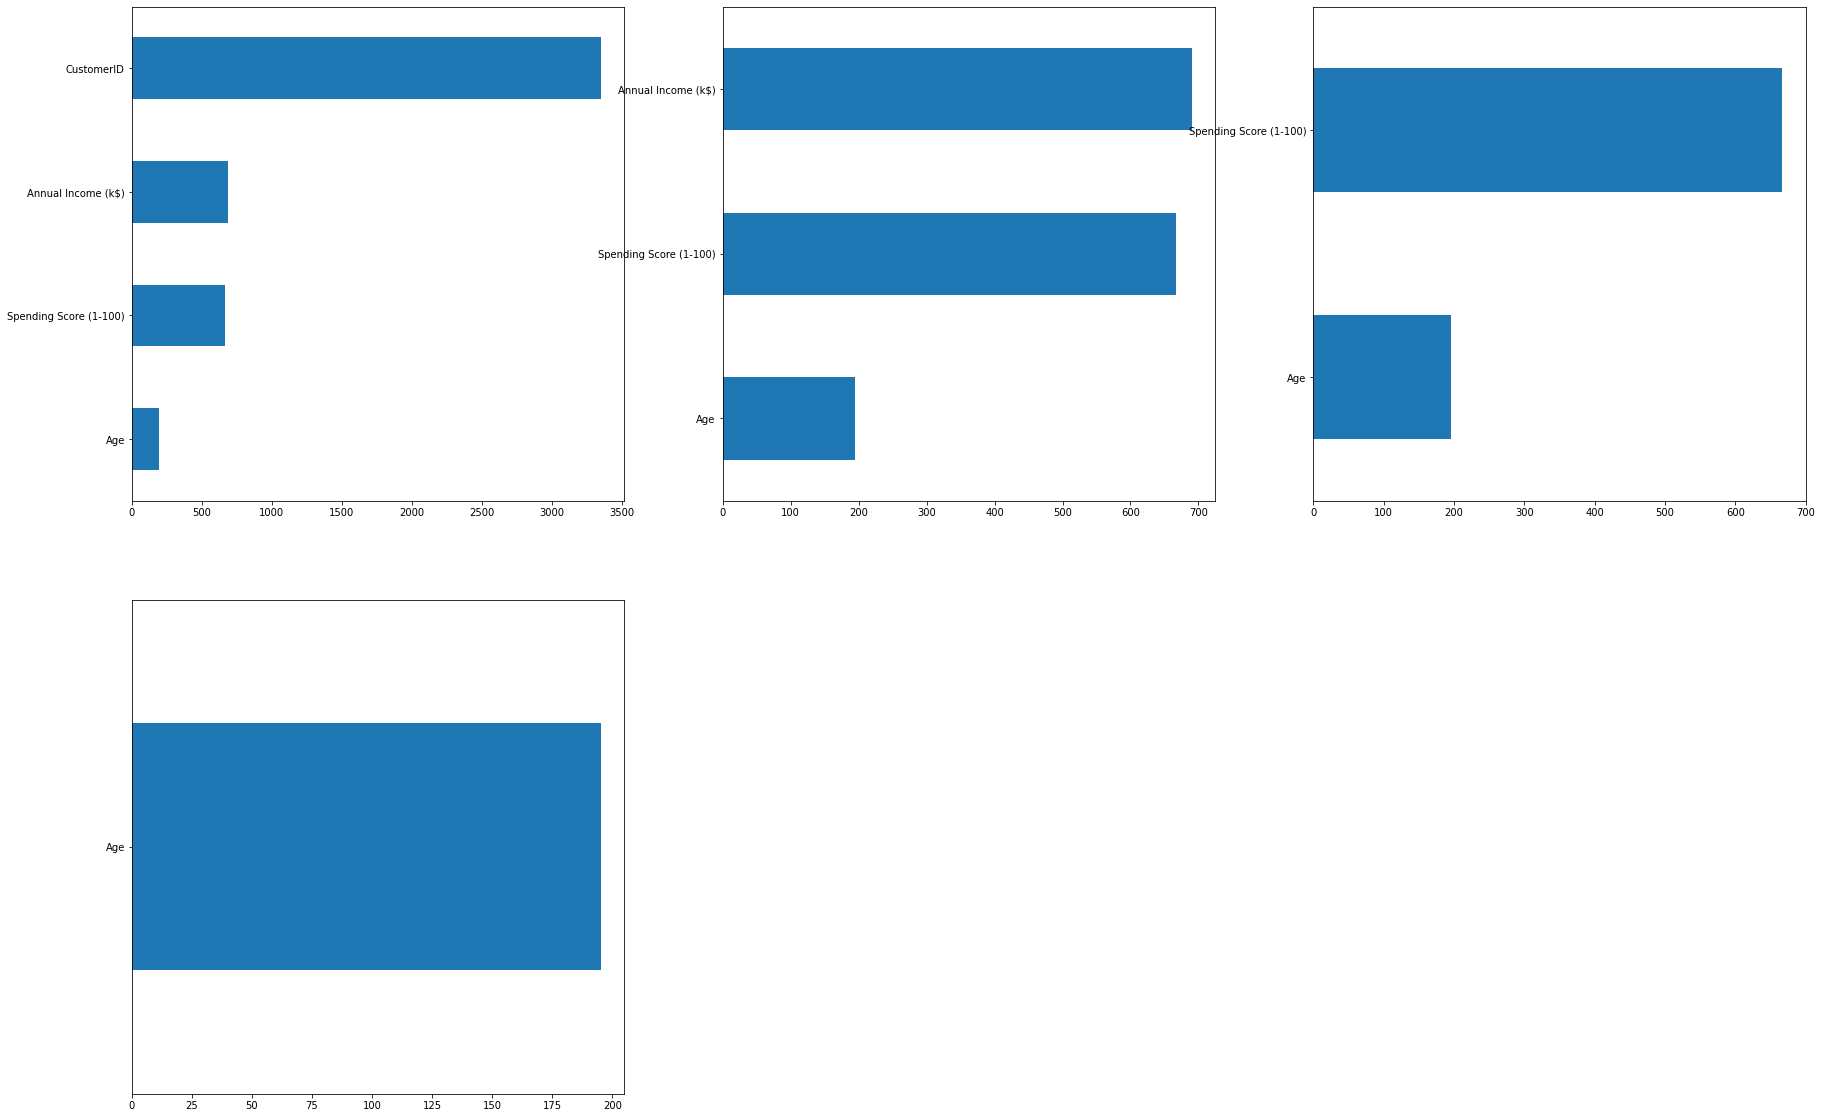

In [84]:
size = len(variance_per_var.index)
rs,cs = (size//5+1, 5) if size >= 5 else  (size//3+1, 3)

plt.figure(figsize=(cs*10, rs*10))
for i, col_name in enumerate(variance_per_var.index):
  plt.subplot(rs, cs, i+1)
  variance_per_var[col_name:].sort_values(ascending=True).plot.barh();

In [85]:
df.var().sort_values(ascending=False).round(2)

CustomerID                3350.00
Annual Income (k$)         689.84
Spending Score (1-100)     666.85
Age                        195.13
dtype: float64

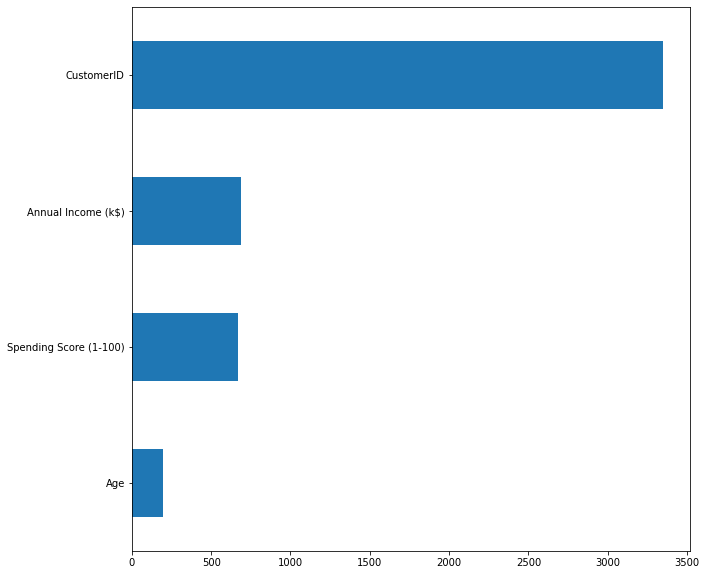

In [86]:
plt.figure(figsize=(10, 10))
df.var().sort_values(ascending=True).plot.barh();

## Bivariate & Multivariate Analysis

In [87]:
num_cols

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [88]:
cat_cols

Index(['Gender'], dtype='object')

In [89]:
len(df.columns) == (len(num_cols) + len(cat_cols))

True

<AxesSubplot:>

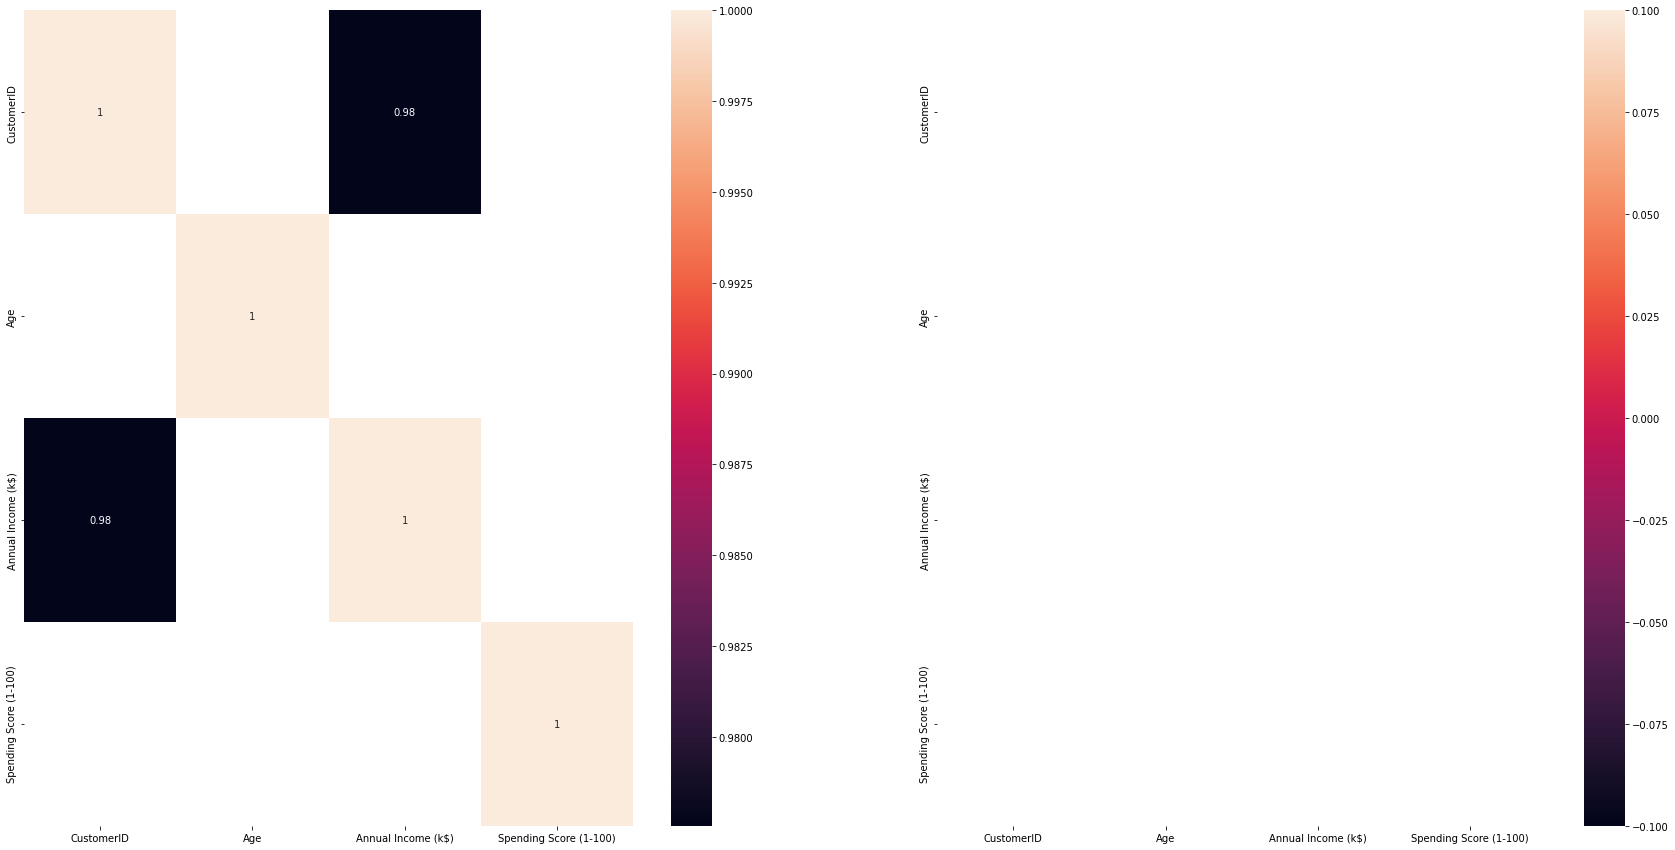

In [90]:
tmp_corrs = df.corr()

plt.figure(figsize=(30,15))

plt.subplot(1,2,1)
sns.heatmap(tmp_corrs[tmp_corrs>0.5], annot=True)

plt.subplot(1,2,2)
sns.heatmap(tmp_corrs[tmp_corrs < -0.5], annot=True)

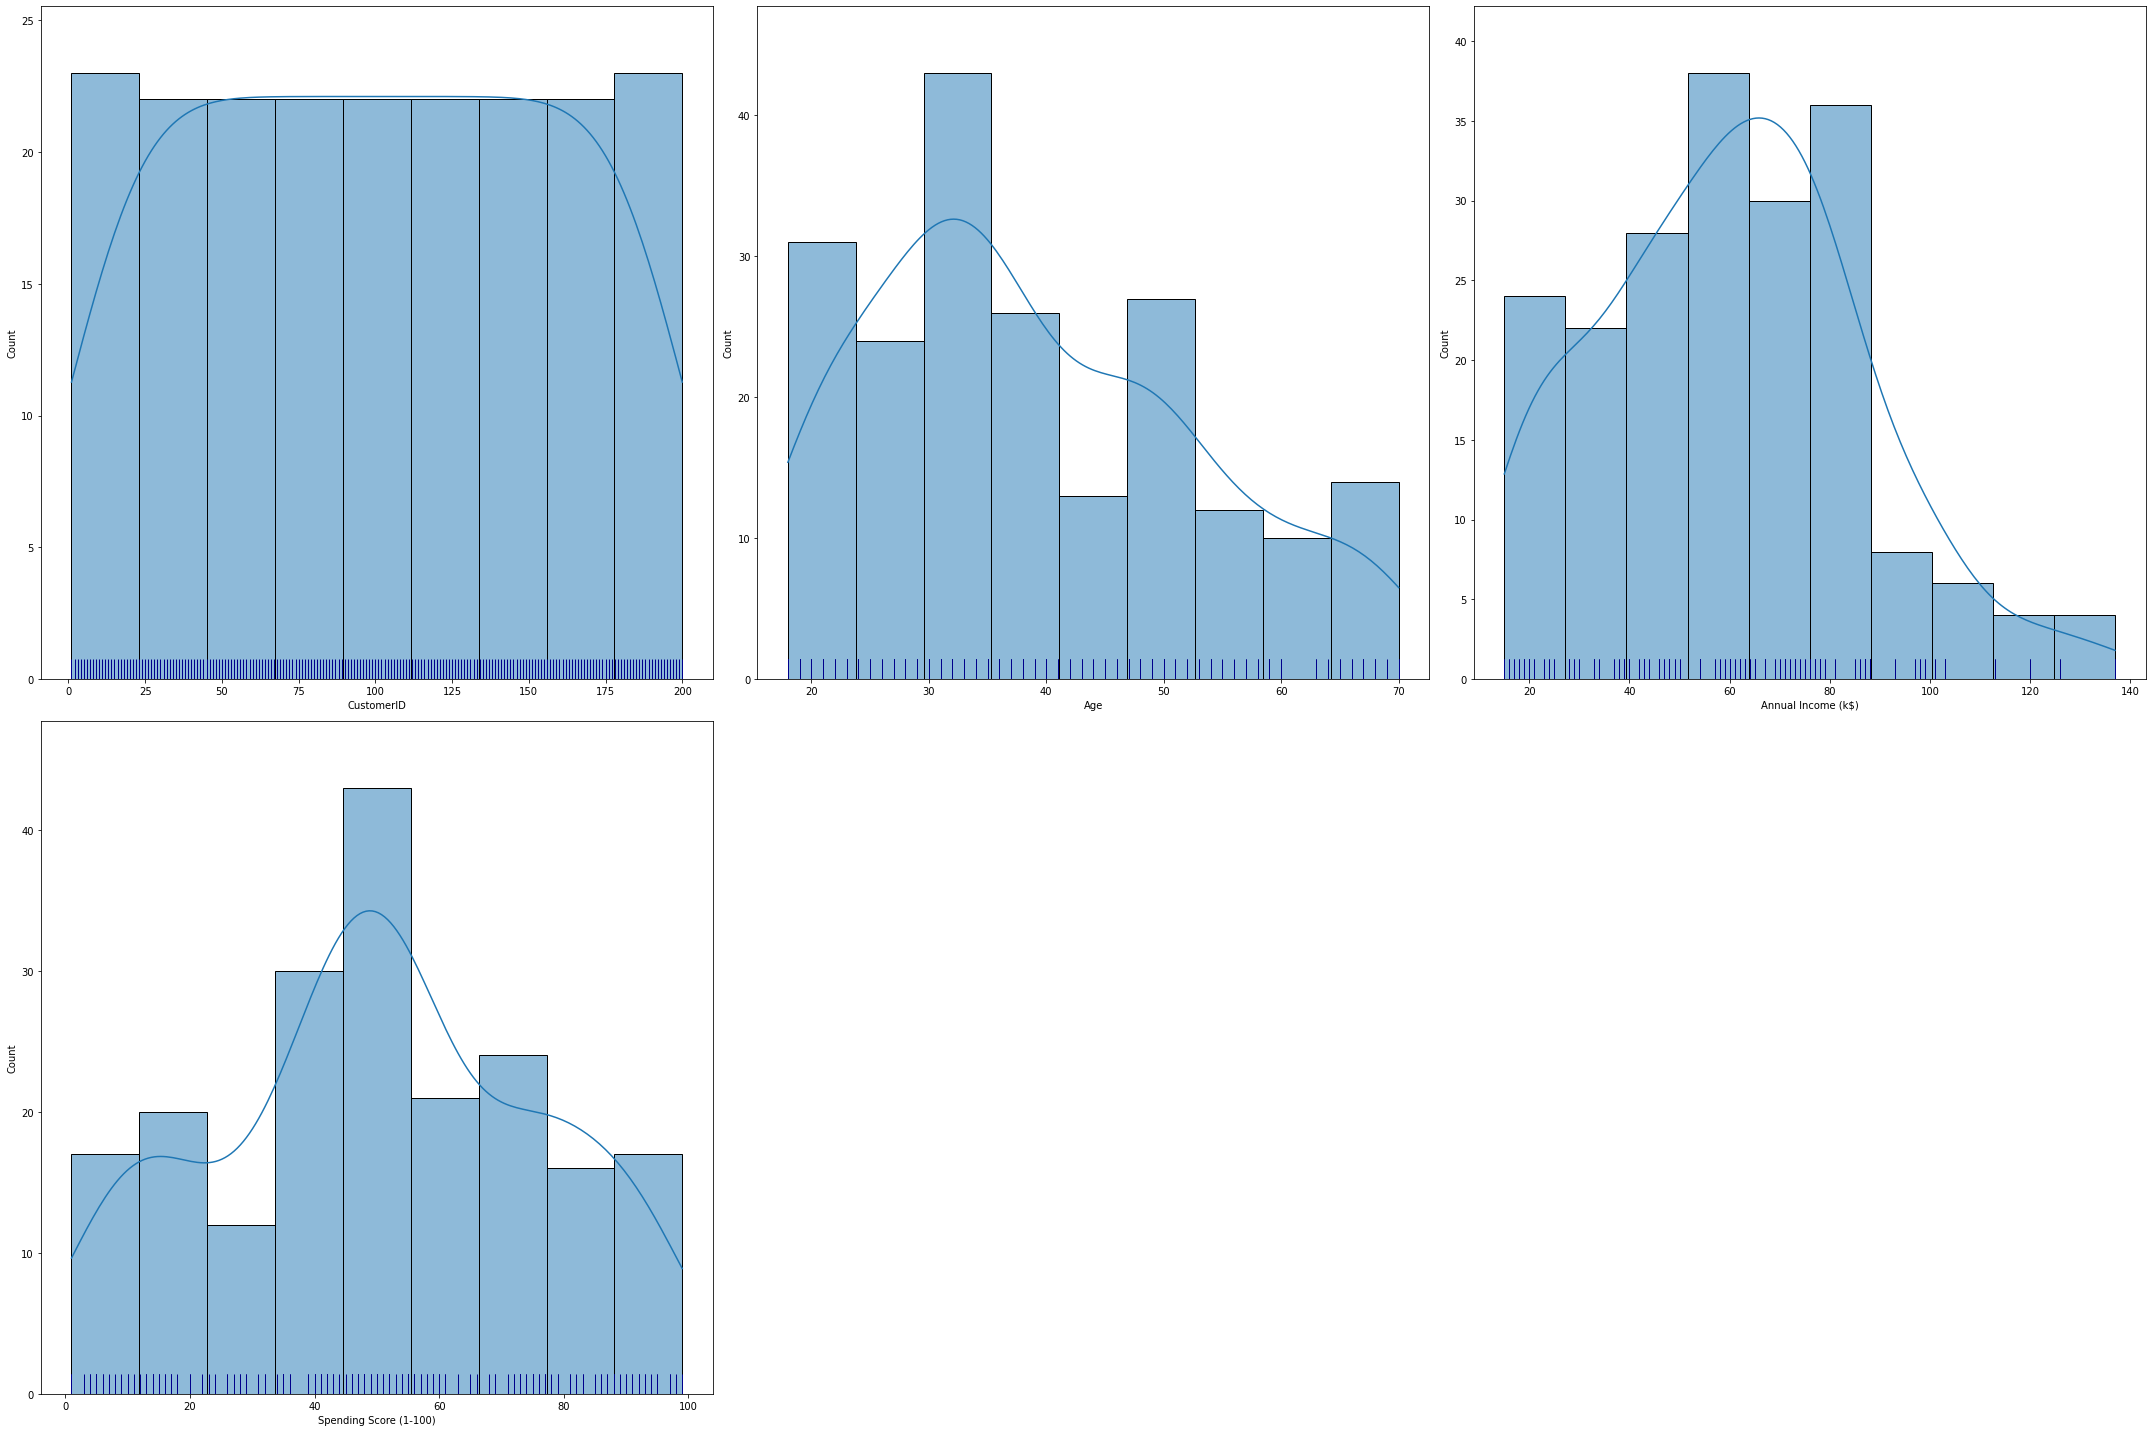

In [92]:
size = len(num_cols)
cs, rs = (5,size//5+1) if size>=5 else (3,size//3+1)

fig = plt.figure( figsize=(cs*10, rs*10))
for i, col in enumerate(num_cols):
    plt.subplot(rs,cs,i+1)
    sns.histplot(x=df[col], data=df, kde=True) #  hue=df[target_var],
    sns.rugplot(x=df[col], data=df,  height=.03, color='darkblue') # hue=df[target_var],
    
fig.tight_layout()  
plt.show()

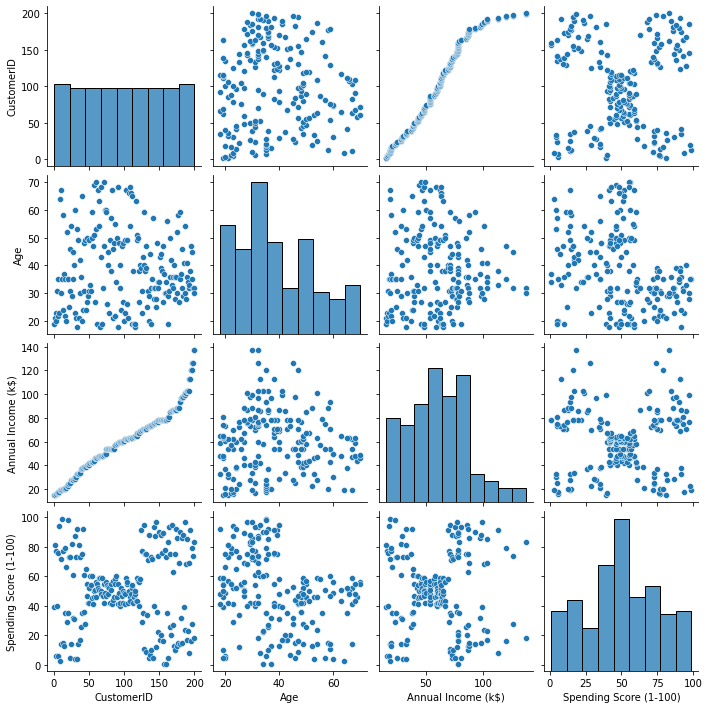

In [93]:
sns.pairplot(df[num_cols]);
# sns.pairplot(df[num_cols], hue=target_var);

# (E) Clustering

## Basic Clustering

### Visualize the data

In [94]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [125]:
# cluster on 2 features
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)','Age']]
df1.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

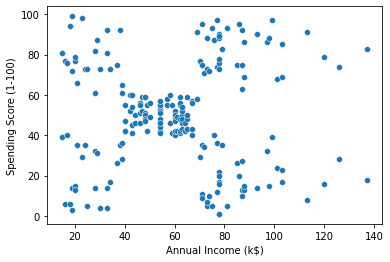

In [126]:
# scatter plot
sns.scatterplot(df1['Annual Income (k$)'], df1['Spending Score (1-100)'])

### Tuning the Clustering options

In [127]:
from sklearn.cluster import KMeans
errors = []
neig_nums= range(1, 11)
for i in neig_nums:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

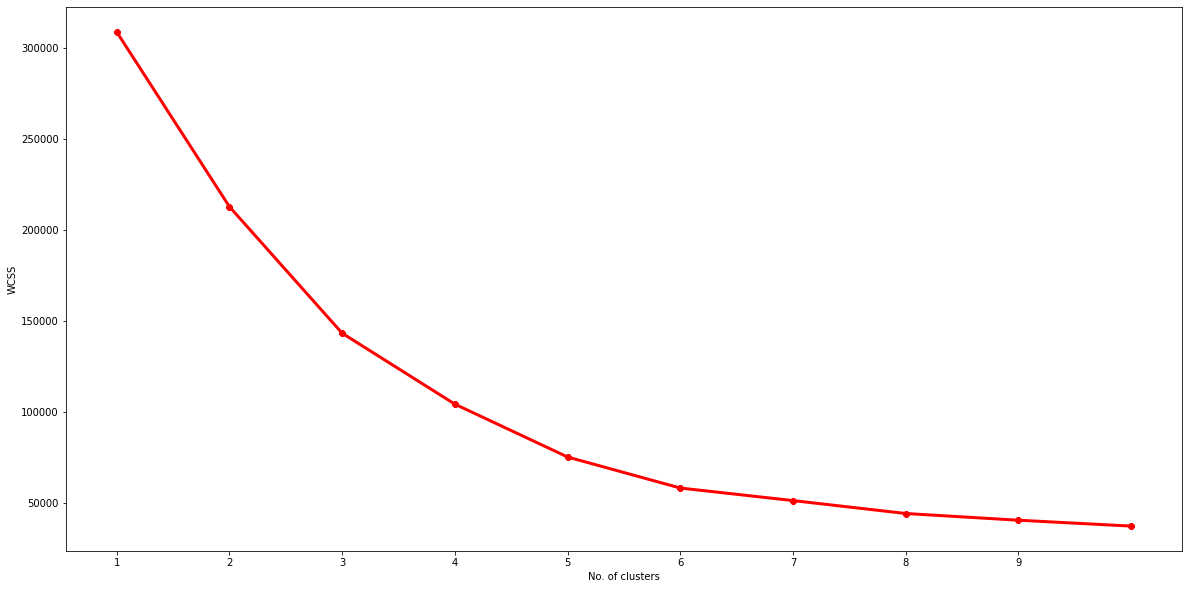

In [128]:
# plot the results for elbow method
plt.figure(figsize=(20,10))

# plotting the figure
plt.plot(neig_nums, errors)
plt.plot(neig_nums, errors, linewidth=3, color='red', marker='8')

# COnfigurating the figure
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,len(neig_nums),1));

### Determinating the model

In [129]:
selected_n = 5

In [130]:
km = KMeans(n_clusters=5)
km.fit(df1)

KMeans(n_clusters=5)

In [131]:
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,0
1,15,81,21,4
2,16,6,20,0
3,16,77,23,4
4,17,40,31,0


### Visualizating the clusters

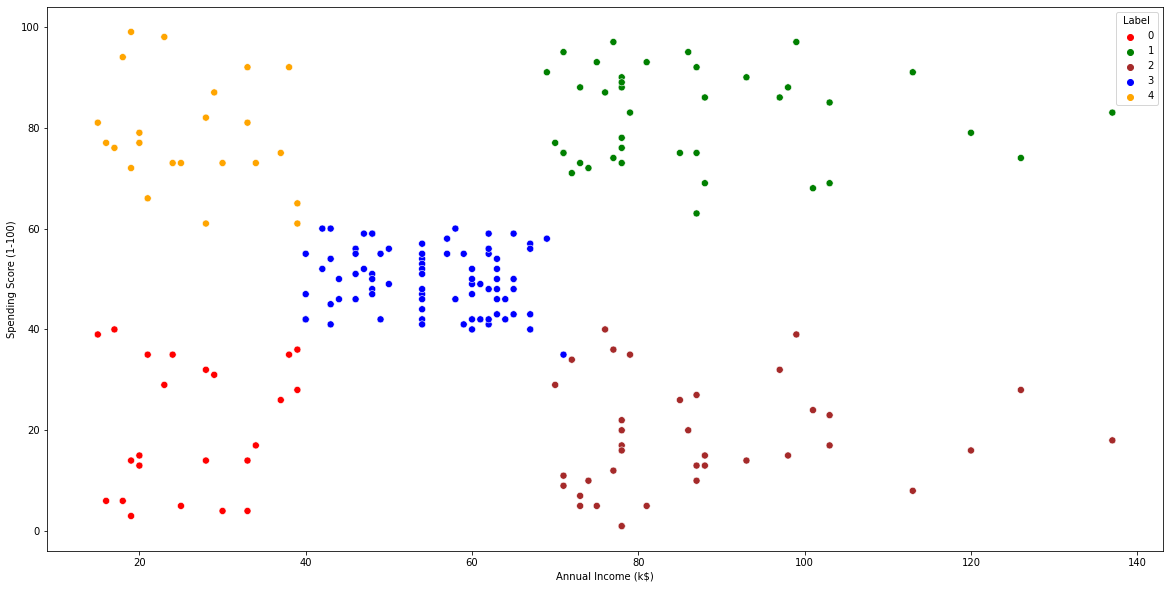

In [132]:
colors = ['red', 'green', 'brown', 'blue', 'orange']

scat_params = {
    "x":"Annual Income (k$)",
    "y":"Spending Score (1-100)",
    "data":df1,
    "hue":'Label',
    "s":50,
    "palette":colors
}

plt.figure(figsize=(20,10))
sns.scatterplot(**scat_params);

In [121]:
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,0
1,15,81,2
2,16,6,0
3,16,77,2
4,17,40,0


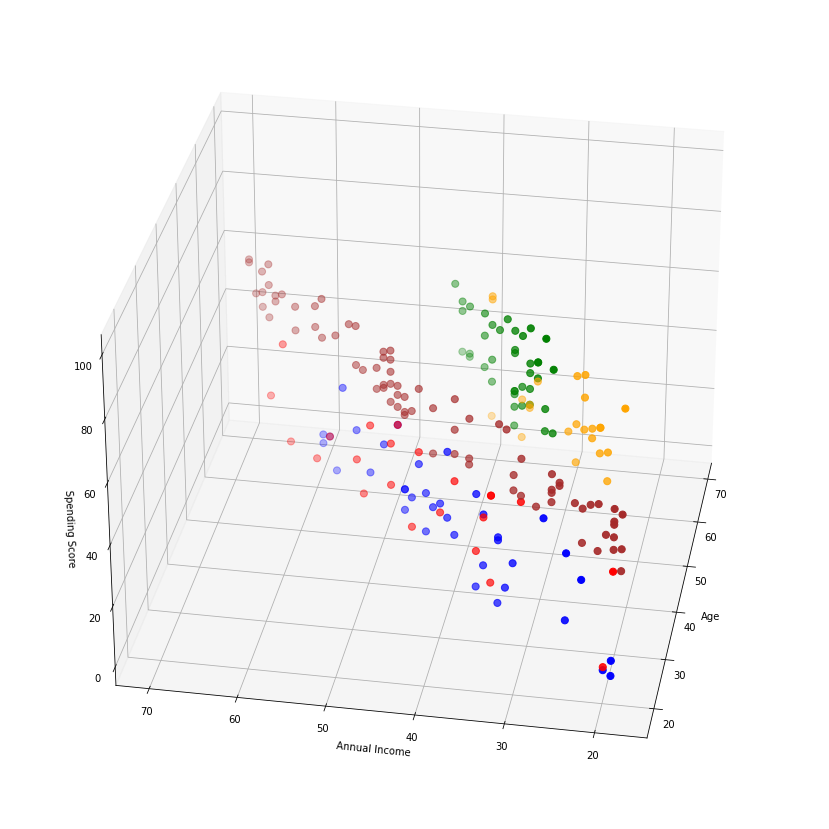

In [134]:
# 3d scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d') # projection='3d'

# preparing the data
v1 = df1['Age']
v2 = df1['Annual Income (k$)']
v3 = df1['Spending Score (1-100)']
c = df1['Label']

# plotting
ax.scatter(v1[c==0], v1 [c==0], v3[c==0], c='red', s=50)
ax.scatter(v1[c==1], v1 [c==1], v3[c==1], c='green', s=50)
ax.scatter(v1[c==2], v1 [c==2], v3[c==2], c='blue', s=50)
ax.scatter(v1[c==3], v1 [c==3], v3[c==3], c='brown', s=50)
ax.scatter(v1[c==4], v1 [c==4], v3[c==4], c='orange', s=50)

# configurating the figure
ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

## Tuning

### K-means Cluster

In [149]:
df_sub = df[['Annual Income (k$)', 'Spending Score (1-100)','Age']]

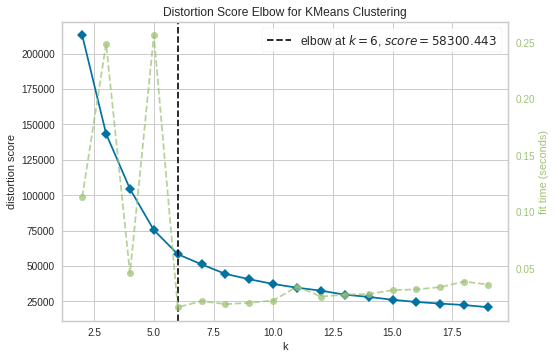

In [151]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# creating kmeans instance
km_cluster = KMeans()

# visualizating the clustering process
visualizer = KElbowVisualizer(km_cluster, k=(2,20))

# Clustering
visualizer.fit(df_sub)

# display the figure
visualizer.show();

# getting the optimum n value
optimum_n = visualizer.elbow_value_

In [156]:
from sklearn.cluster import KMeans
kmeans_tuned = KMeans(n_clusters=optimum_n).fit(df_sub)

tuned_results = df_sub.copy()
tuned_results["label"] = kmeans_tuned.labels_ # +1
tuned_results.head()

,Annual Income (k$),Spending Score (1-100),Age,label
0,15,39,19,3
1,15,81,21,5
2,16,6,20,3
3,16,77,23,5
4,17,40,31,3


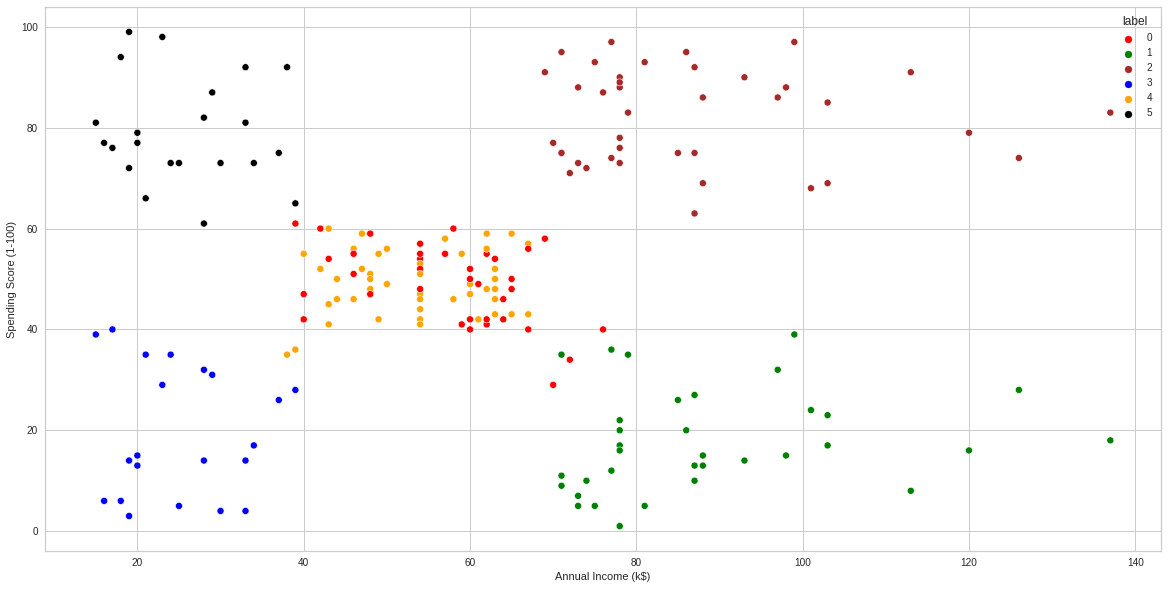

In [217]:
colors = ['red', 'green', 'brown', 'blue', 'orange', 'black']

scat_params = {
    "data":tuned_results,
    "x":"Annual Income (k$)",
    "y":"Spending Score (1-100)",
    "hue":'label',
    "s":50,
    "palette":colors
}

plt.figure(figsize=(20,10))
sns.scatterplot(**scat_params);

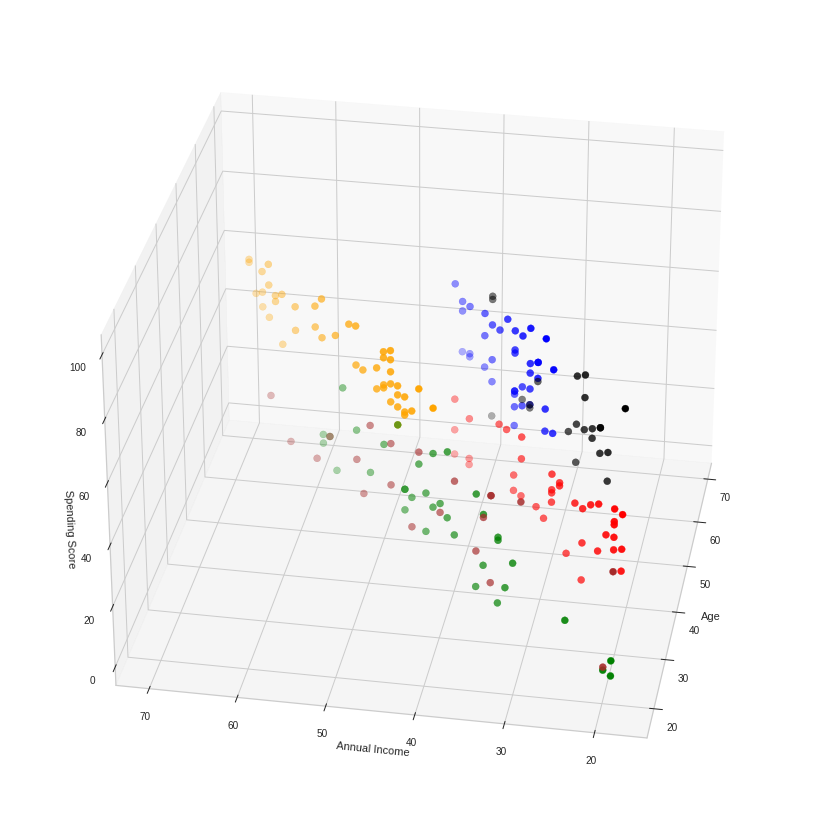

In [213]:
# 3d scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d') # projection='3d'

# preparing the data
v1 = tuned_results['Age']
v2 = tuned_results['Annual Income (k$)']
v3 = tuned_results['Spending Score (1-100)']
c = tuned_results["label"]

# plotting
ax.scatter(v1[c==0], v1 [c==0], v3[c==0], c='red', s=50)
ax.scatter(v1[c==1], v1 [c==1], v3[c==1], c='green', s=50)
ax.scatter(v1[c==2], v1 [c==2], v3[c==2], c='blue', s=50)
ax.scatter(v1[c==3], v1 [c==3], v3[c==3], c='brown', s=50)
ax.scatter(v1[c==4], v1 [c==4], v3[c==4], c='orange', s=50)
ax.scatter(v1[c==5], v1 [c==5], v3[c==5], c='black', s=50)


# configurating the figure
ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

### Hierarchical

#### AgglomerativeClustering

In [163]:
df_sub = df[['Annual Income (k$)', 'Spending Score (1-100)','Age']]

In [199]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import numpy as np


# define the custom scoring metric
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score

# Define the model and the parameter grid
model = AgglomerativeClustering(compute_full_tree=True, memory='mycachedir')
param_grid = {
    'n_clusters': np.arange(2, 11),
    'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
    'linkage': ['ward', 'complete', 'average']
}

# Create the grid search object
cltr = GridSearchCV(model, param_grid, cv=5, scoring=silhouette_scorer)

In [200]:
# Fit the grid search to the data
cltr.fit(df_sub)

# Print the best parameters and the corresponding score
print("Best parameters: ", cltr.best_params_)

Best parameters:  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 2}


In [207]:
best_cluster = cltr.best_estimator_
labels = best_cluster.fit_predict(df_sub)

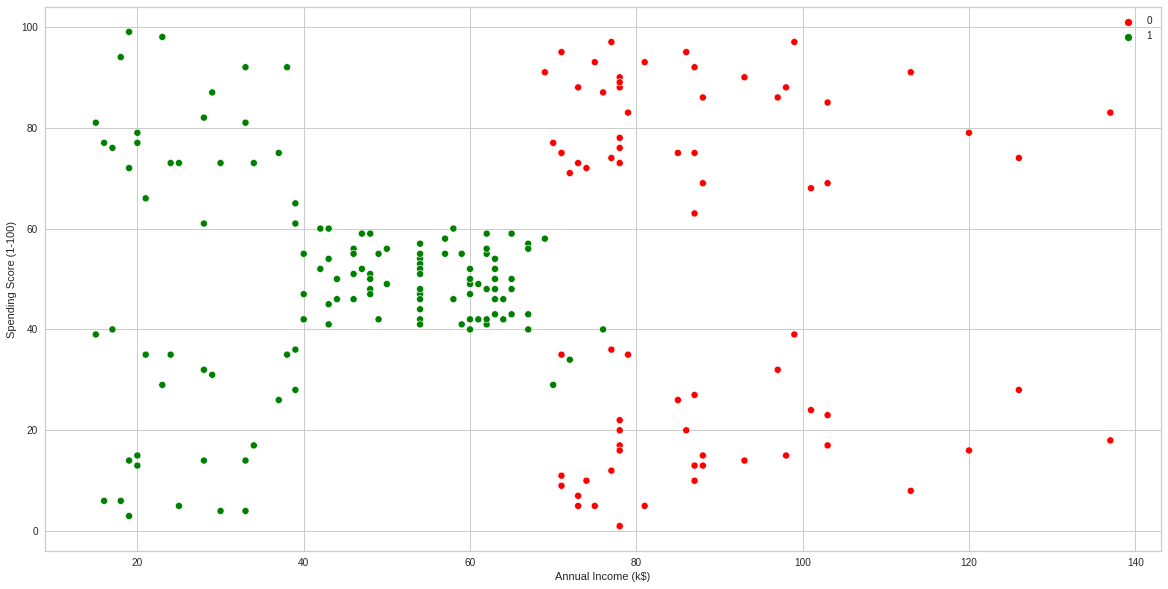

In [220]:
colors = ['red', 'green']

scat_params = {
    "x":df_sub["Annual Income (k$)"],
    "y":df_sub["Spending Score (1-100)"] ,
    "hue":labels,
    "s":50,
    "palette":colors
}

plt.figure(figsize=(20,10))
sns.scatterplot(**scat_params);

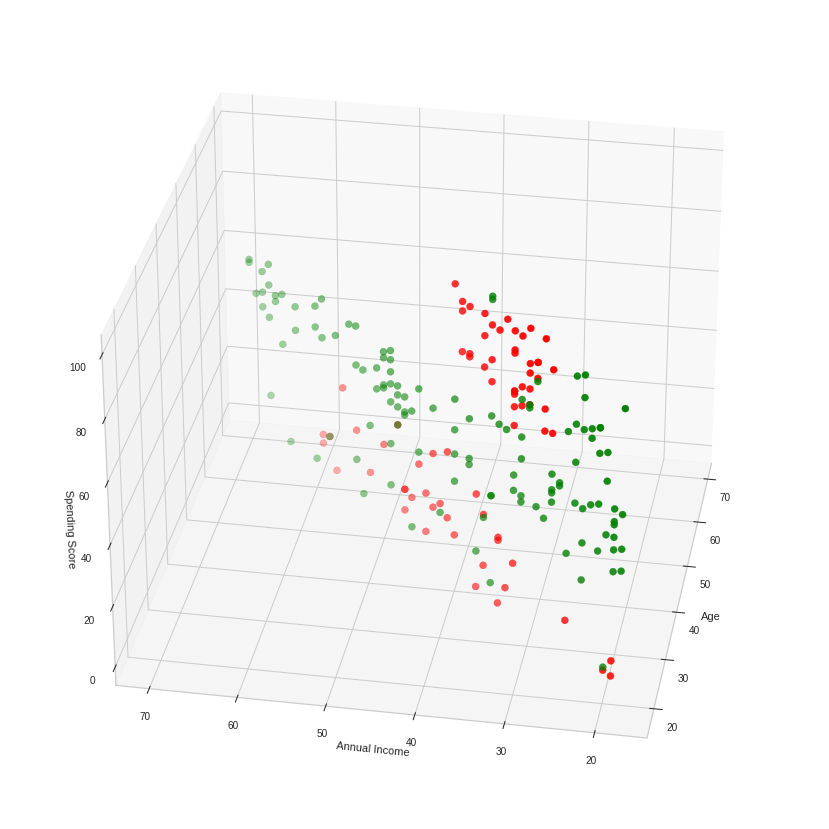

In [209]:
# 3d scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d') # projection='3d'

# preparing the data
v1 = df_sub['Age']
v2 = df_sub['Annual Income (k$)']
v3 = df_sub['Spending Score (1-100)']
c = labels

# plotting
ax.scatter(v1[c==0], v1 [c==0], v3[c==0], c='red', s=50)
ax.scatter(v1[c==1], v1 [c==1], v3[c==1], c='green', s=50)


# configurating the figure
ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

#### Dendogram visualization

In [ ]:
from sklearn.datasets import make_blobs

# Generate random dataset
X, y = make_blobs(n_samples=500, centers=5, random_state=0)

In [168]:
from scipy.cluster.hierarchy import linkage

# hierarchical clastering according to given method strategy
hc_complete = linkage(df_sub,"complete")
hc_average = linkage(df_sub,"average")
hc_single = linkage(df_sub, "single")

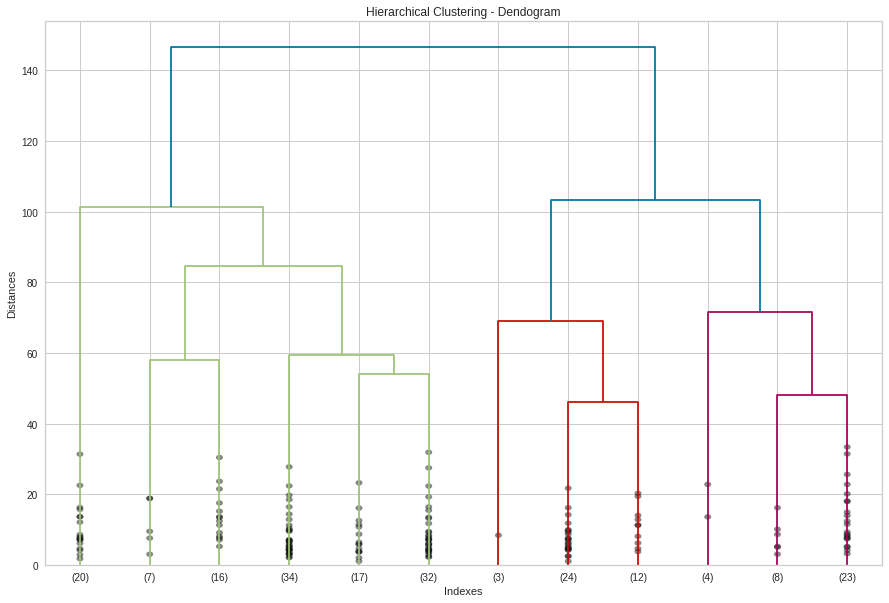

In [169]:
from scipy.cluster.hierarchy import dendrogram

# creating a figure
plt.figure(figsize=(15, 10))
plt.title("Hierarchical Clustering - Dendogram")
plt.xlabel("Indexes")
plt.ylabel("Distances")

# plotting the dendogram with 12 cluster
dendogram_result = dendrogram(hc_complete, leaf_font_size=10, truncate_mode="lastp", p=12, show_contracted= True);

In [222]:
from sklearn.cluster import AgglomerativeClustering

# we determinate 4 cluster through interpreting the graph respectly domain knowledge and business goal
agg_cluster = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
agg_cluster_results = agg_cluster.fit_predict(df_sub)

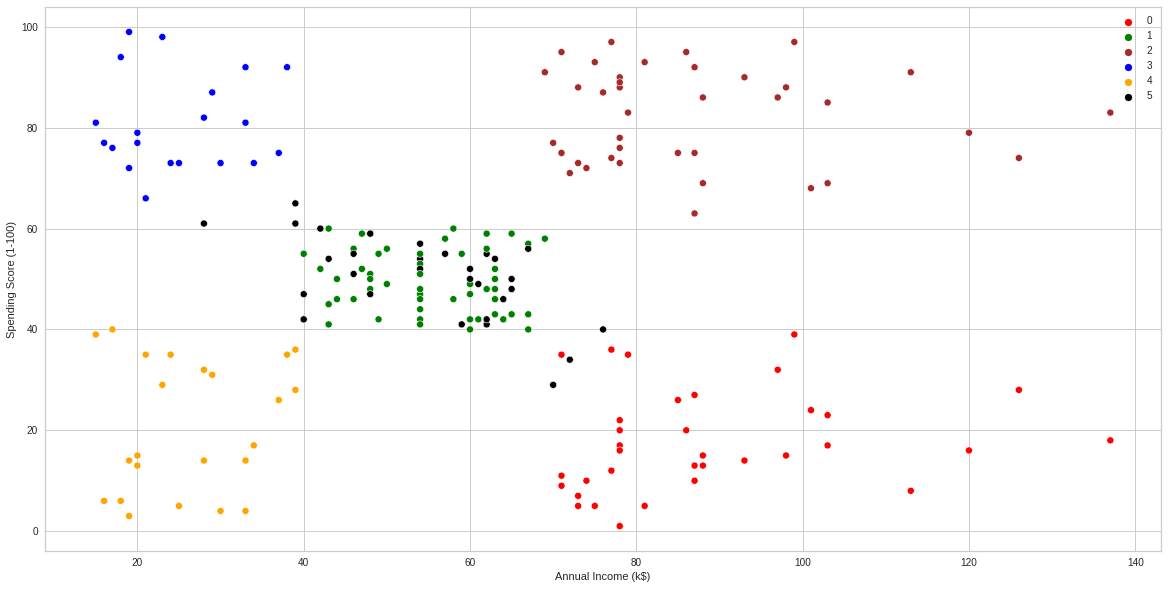

In [223]:
colors = ['red', 'green', 'brown', 'blue', 'orange', 'black']

scat_params = {
    "x":df_sub["Annual Income (k$)"],
    "y":df_sub["Spending Score (1-100)"] ,
    "hue":agg_cluster_results,
    "s":50,
    "palette":colors
}

plt.figure(figsize=(20,10))
sns.scatterplot(**scat_params);

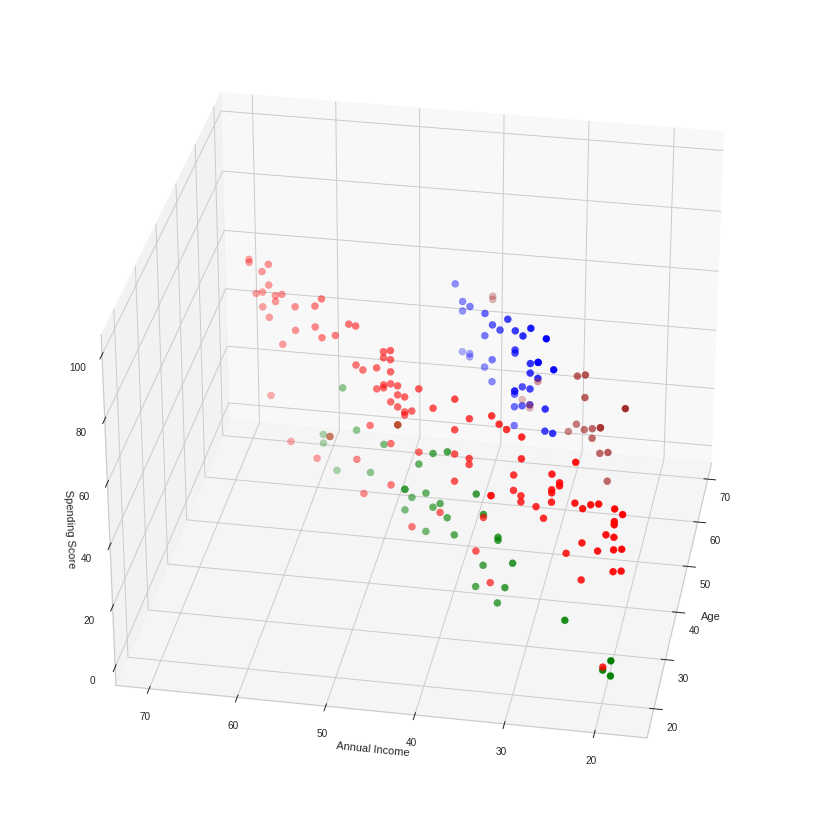

In [214]:
# 3d scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d') # projection='3d'

# preparing the data
v1 = df_sub['Age']
v2 = df_sub['Annual Income (k$)']
v3 = df_sub['Spending Score (1-100)']
c = agg_cluster_results

# plotting
ax.scatter(v1[c==0], v1 [c==0], v3[c==0], c='red', s=50)
ax.scatter(v1[c==1], v1 [c==1], v3[c==1], c='green', s=50)
ax.scatter(v1[c==2], v1 [c==2], v3[c==2], c='blue', s=50)
ax.scatter(v1[c==3], v1 [c==3], v3[c==3], c='brown', s=50)
ax.scatter(v1[c==4], v1 [c==4], v3[c==4], c='orange', s=50)
ax.scatter(v1[c==5], v1 [c==5], v3[c==5], c='black', s=50)

# configurating the figure
ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

# (F) Saving & Downloading the model

### Saving the model

In [276]:
import pickle
model_save_path = 'cluster.sav'
pickle.dump(kmeans_tuned, open(model_save_path, 'wb'))

### Loading the model

In [277]:
loaded_model = pickle.load(open(model_save_path, 'rb'))

### Zipping the model
```python
import os 
zip_dst, src = f"{model_save_path}.zip", model_save_path
os.system(f"zip -r {zip_dst} {src}" )
```

### Downloading the model

In [278]:
from google.colab import files
files.download(model_save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# (G) Deployment as App

## APP (loading from file)

### Declerations & Util Funcs

In [1]:
import os 
if os.system("pip freeze | grep gradio==") != 0: os.system("pip install gradio")
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 KB

In [5]:
import pickle
import json 
import numpy as np
import pandas as pd

# File Paths
model_path = 'cluster.sav'

# Loading the files
model = pickle.load(open(model_path, 'rb'))

In [9]:
def cluster(*args):

  # preparing the input
  features = np.array([*args]).reshape(1,3)

  # prediction
  pred = model.predict(features)
  return pred

In [10]:
ex_data, ex_y = [39, 61, 31], 0
cluster(*ex_data), ex_y

(array([0], dtype=int32), 0)

In [11]:
examples = [
    [39, 61, 31],
    [71, 35, 43],
    [69, 91, 39],
    [15, 39, 19],
    [38, 35, 65],
    [15, 81, 21],
]

### Launching Block App

In [12]:
import gradio as gr

with gr.Blocks() as demo:

    # input components
    annual_income  = gr.inputs.Slider(minimum=15, maximum=137, default=15, label="Annual Income (k$)")
    score = gr.inputs.Slider(minimum=1, maximum=99, default=39, label="Spending Score (1-100)")
    age = gr.inputs.Slider(minimum=18, maximum=70, default=19, label="Age")
    inputs = [annual_income, score, age]

    # other components
    cluster_btn = gr.Button("Cluster")
    output = gr.Number(label="Customer Segment No")
    
    # connecting function
    cluster_btn.click(fn=cluster, inputs=inputs, outputs=output) #examples=examples
    gr.Examples(examples, inputs)


demo.launch()

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>